# Link to the Video
https://uni-koeln.sciebo.de/s/CwuQppERJtNhdof

# Password
**exhausting_project**

# **Motivation**

This project is based on the work done by Lu et al in 2018 and 2019 which grew out of a **need to enable content analysis** to better find images of interest from the publicily accessible Planetary Data System (PDS) Imaging Node which hosts millions of images obtained from the planet Mars.

The images accquired by PDS contain descriptive information regarding the preprocessing and transfer to Earth but most often users need images based on content which could only be extracted through content analysis. They proposed a solution which involved a deep CNN and utilized transfer learning to adapt CaffeNet- a variant of AlexNet for use with Mars orbital and surface images.

**CaffeNet** is a replication of AlexNet with some differences: a) relighting augmentation not included in the training; b) the order of pooling and normalization layers is switched where in CaffeNet the pooling is done before normalization. The model was trained for 310,000 iterations on 1.2 million ImageNet images from 1000 classes. 

The authors **fine tuned CaffeNet and employed a classifier calibration** using temperature scaling which "does not change the predictions (or overall accuracy); instead it impacts accuracy at a given confidence cutoff" (they use a cutoff of 90%). They call these networks **HiRISENet and MSLNet**. 

They accuracies of the models can be found in the table below. "aug" stands for augmentation and "FT" stands for fine tuning. 



### **Why are we interested in this problem?**

1. The class distribution of the datasets is severely imbalanced and is prone to change over time with respect to not just an influx of data but also changing classes or labels with better understanding of the surface of Mars. Therefore handling the latest dataset (09.2020), different from the authors (01.2019), presented us with the opportunity to utilize the paper as a template while looking out for unexpected issues.

2. The dataset consists of images from Mars that SOTAs are not trained with; therefore we think it will be interesting to see how the popular models such as VGG, Inception, etc perform on this unique dataset. 

3. Given that the HiRISENet and MSLNet are not availabe on the internet, and nor is the architecture discussed in detail the paper, building our own model and getting a feel about how the model needs to be built to acheive the accuracies mentioned in the paper seems exciting and promising.


**Note:**

The dataset we used in our work is different from that of the authors in two ways: 

1. The dataset used for HiRISENet consists of 10,433 Mars landmark images cropped from 180 HiRISE map-projected images. This is then augmented to obtain a total of 73,031 landmark images covering eight classes. Our dataset consists of 64,947 landmark images including augmented ones (more details in the following section) sourced from 232 images.

2. The dataset used for MSLNet consists of 6,691 MSL images with labels that span over 24 classes while ours consists of 6,820 images spanning over 19 classes.

The HiRISE dataset that we have definetly isn't more balanced and representative as shown in Figure-1. And the MSL dataset has a large difference in the classes which could potentially influence any analysis that involves direct comaprison of models. Therefore, differences between the datasets used by the authors and by us needs to be studied further but this is beyond the scope of the project due to time constraints.









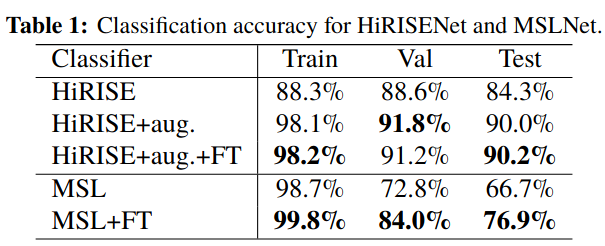

# **Learning Objectives**

1. Build a simple CNN for HiRISE data and address class imbalance.
2. Improve on the CNN to highlight the need for better neural networks for the problem at hand
3. Employ transfer learning using Mobilenet and Inception on HiRISE  data to evaluate performance and compare with our models.
4. Employ transfer learning with VGG and Inception on MSL dataset to see how it compares with the 2018 paper cited below.
5. Construct an autoencoder for filling incomplete images belonging to a selected class from the HiRISE dataset.


# **HiRISE** 

## **About**

HiRISE (High Resolution Imaging Science Experiment) is one of six instruments onboard the Mars Reconnaissance Orbiter. The orbiter was launched in 2005, arrived at Mars in 2006 and has been imaging ever since. The camera has a resolution capability of imaging up to 30 centimeters per pixel and is an important instrument for helping to select landing sites for robotic and future human exploration.

## **Dataset**

Created: 17.09.2020 

Accessed: 06.12.2020

URL: https://zenodo.org/record/4002935

Dataset contains a total of 64,947 landmark images detected and extracted from HiRISE browse images, spanning 232 separate source images. The dataset is split into 48,979 training images, 14,175 validation and 1793 test images.

**Data Augmentation**

It consists of 10,815 original landmarks. The creators of the dataset cropped each original landmark to a square bounding box that included the full extent of the landmark plus a 30-pixel margin to the left, right, top, and bottom. Each landmark was then resized to 227x227 pixels. Of these images, 9,022 of them were then augmented to generate 6 additional landmarks using the following methods:

1. 90 degrees clockwise rotation
2. 180 degrees clockwise rotation
3. 270 degrees clockwise rotation
4. Horizontal flip
5. Vertical flip
6. Random brightness adjustment

The remaining 1,793 images were not augmented. Combining these with the 
7 x 9022 images, gives a total of 64,947 separate images. This forms the HiRISE dataset that is used in our work sometimes in its entiretly and sometimes with changes we thought were much necessary. The data comes with train, validation and test sets. More details on this can be found in the EDA which follows after the Bibliography.   

**Classes**

The dataset consists of 8 classes:

0. other
1. crater
2. dark dune
3. slope streak
4. bright dune
5. impact ejecta
6. swiss cheese
7. spider

## **Discussion**

Use the above link for a detailed description of each class. What is important for us to know is that "*Other is a catch-all class that contains images that fit none of the defined classes of interest. This class makes up the majority of our data set.*" This will soon become very important as we begin our classification.

Below are two figures: Figure-1 is the count for all the classes in the training data and Figure-2 is the count for all the classes when the augmented data for class: "other" in not included. This bar graph shows the count only for the training data. 
What is very evident from these figures is that the data has high class imbalance and is the first issue that needs to be tackled before proceeding with any other classification based analysis.  

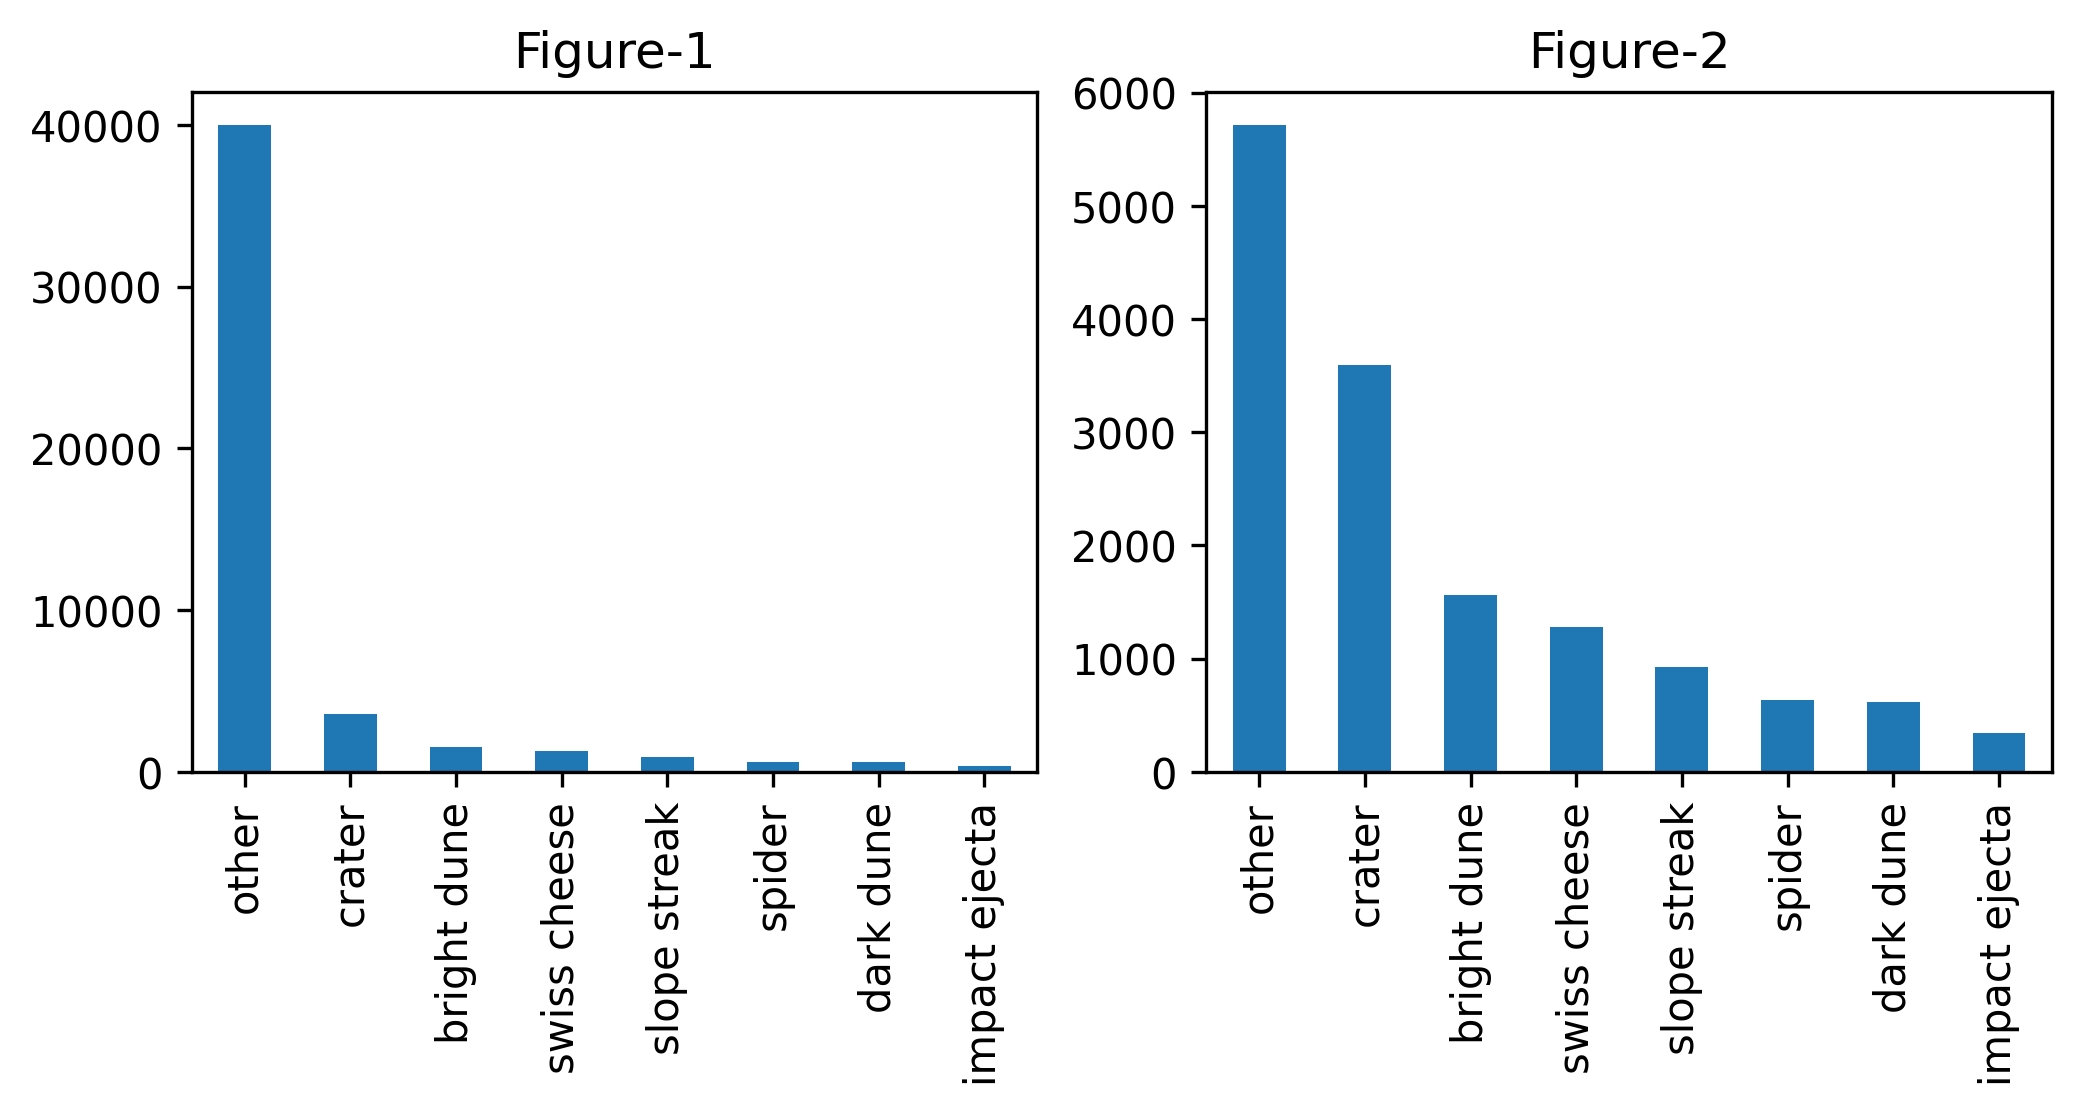

# **MSL**

## **About**

The Mars Science Laboratory (MSL) Mast Camera (Mastcam) system on NASA's Curiosity rover is a pair of fixed‐focal length, multispectral, color CCD imagers mounted ~2 m above the surface on the rover's remote sensing mast. It is tasked with characterizing the details of the history and processes recorded in geologic material at the MSL landing site within Gale crater via observations and documentation of atmospheric and meteorologic events and processes, landscape physiography, etc. 

The Mars Hand Lens Imager (MAHLI) on the other hand, employs a 2-megapixel color camera with a focusable macro lens aboard the rover to "investigate the stratigraphy and grain-scale texture, structure, mineralogy, and morphology of geologic materials in northwestern Gale crater."

## **Dataset**

Created: 16.09.2020

Accessed: 06.12.2020

URL: https://zenodo.org/record/4033453

The data set consists of 6,820 images that were collected by the Mars Science Laboratory (MSL) Curiosity Rover by three instruments: 

1. the Mast Camera (Mastcam) Left Eye; 
2. the Mast Camera Right Eye; 
3.  the Mars Hand Lens Imager (MAHLI). 

The dataset is split into training, validation, and test sets. The training set contains 5,920 images (including augmented); the validation set contains 300 images; the test set contains 600 images. These set were randomly sampled from sol (Martian day) range 1 - 948 for train; 949 - 1920 for validation; 1921 - 2224 for test set images.

All images are resized to 227 x 227 pixels without preserving the original height/width aspect ratio.

**Data Augmentation**

Only the training set contains augmented images. 3,920 of the 5,920 images in the training set are augmented versions of the remaining 2000 original training images. Images taken by different instruments were augmented differently. More information about the augmentation can be found in the link given above.

**Classes**

There are 19 classes with science and engineering interests in this dataset. 

The figure below taken from the paper Lu et al. shows the images from the HiRISENet (top) and MSLNet (bottom) datasets with their classes.

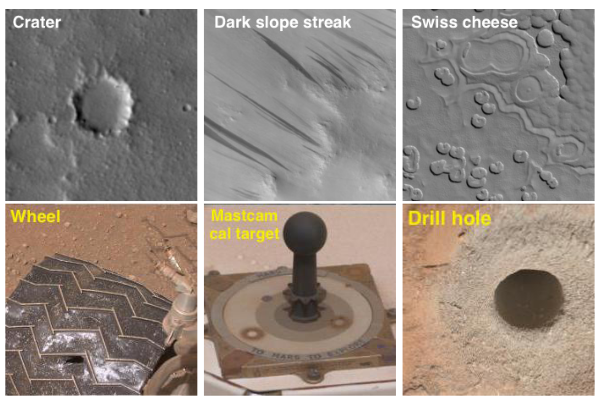

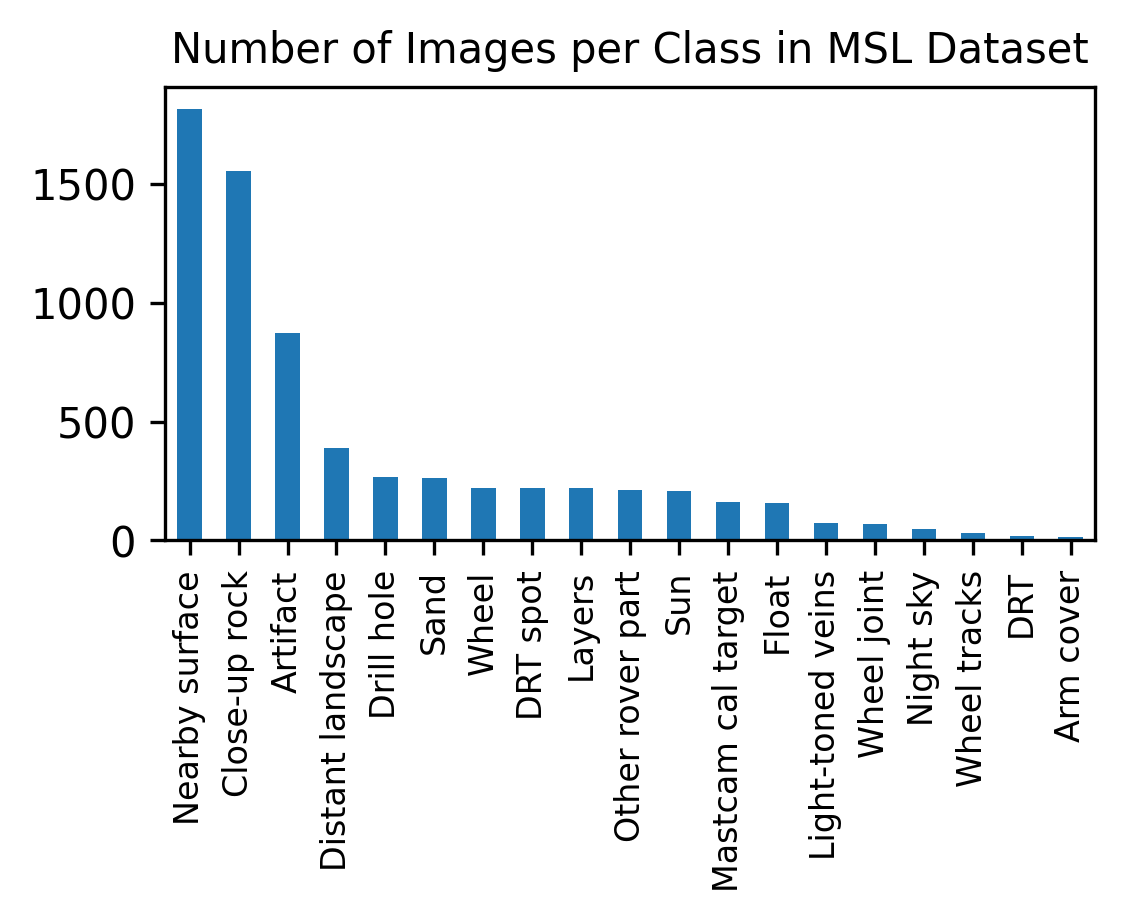

# **Summary of Results**

1. We built a simple 9 layered CNN with 25 million learnable parameters for HiRISE data and encountered a severe class imbalance. We approached the problem by removing augmented images from the majority class and appying class weights. Our test accuracy hit 80% but that is attributed again to the correct labelling of the majority class rather than the overall classes. 

2. We also used custom deeper layered CNN but with less learnable parameters and used custom preprocessor (PatchPreprocessor) as a train-time augmentation to help reduce overfitting and crop-preprocessor as a test-time augmentation to improve the accuracy. To implement all this we used our own custom made HDF5 Dataset Generator. We got 84% accuracy with deeper CNN and improved the accuracy to 85.72% using crop-preprocessor. Further, we used the ResNet50 as a feature extractor and trained Logistic Regression Classifier on the extracted features and we got the accuracy boost to 88%.

3. We employed transfer learning using MobileNet and Inception on HiRISE  data to evaluate performance of these models on our data. We found that Inception performed better than MobileNet when evaluating the test accuracy with 90.4% for the latter and 91.75% for the former. The authors report a test accuracy of 90.2% on their best model. But test accuracies can bemisleading or maybe one can say test accuracies don't reveal the exact anture of performace so such results must be taken with a grain of salt.

4. We initally wanted to apply transfer learning via the weights saved from our custom models onto MSL data given that the models were trained on Mars images and would possibly perform better with MSL data as compared to SOTA. But since we weren't able to get satisfactory results from the custom model on HiRISE data itself, we decided to drop the plan as it would be resources spent unwisely. 

5. Nevertheless we were curious to see how the perfromace of SOTAs such as VGG16 and Inception on MSL dataset. We achieved a test accuracy of 74% and 79%, on our data, for VGG16 and Inception respectively, while the authors report 76.9% for their fine tuned MSLNet. 

6. We constructed an autoencoder with the aim of reconstructing a fraction of an image. The performance was not as expected, but we believe that the model needs more training time and fine tuning to acheieve the results we're looking for. 


# **Our Learnings**

1. Class imbalances are a difficult topic. While several methods exist to tackle this imbalance, in our case, the data will grow with time, and handling this domain shift problem is a non trivial task and cannot be addressed with class balancing methods. Therefore, sometimes it is important to accept the data as is while finding better ways to interept the results and performance.

2. Working with real world data is a lot different than working with well structured data, it requires a lot of processing before training the model to get some good results.

3. Be very very very patient to get good results.

4. It's important to remember that with ML and AI: "Garbage In, Garbage Out".


# **Bibliography:**

Gary Doran, Emily Dunkel, Steven Lu, & Kiri Wagstaff. (2020). Mars orbital image (HiRISE) labeled data set version 3.2 (Version 3.2.0) [Data set]. Zenodo. http://doi.org/10.5281/zenodo.4002935

Steven Lu, & Kiri L. Wagstaff. (2020). MSL Curiosity Rover Images with Science and Engineering Classes (Version 2.1.0) [Data set]. Zenodo. http://doi.org/10.5281/zenodo.4033453

S. Lu, K. Wagstaff, J. Cai, G. Doran, K. Grimes, J. Lee, L. Mandrake,and Y Yue. Improved content-based image classifiers for the pds imageatlas.2019.

Kiri L. Wagstaff, You Lu, Alice Stanboli, Kevin Grimes, Thamme Gowda, and Jordan Padams. "Deep Mars: CNN Classification of Mars Imagery for the PDS Imaging Atlas." Proceedings of the Thirtieth Annual Conference on Innovative Applications of Artificial Intelligence, 2018.


In [ ]:
# Importing all the necessary packages

# Tensorflow imports
import tensorflow as tf
import tensorflow_datasets as tfds

# Helper libraries
import math
import numpy as np
import matplotlib
matplotlib.use('PS') #prevent import error due to venv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# Imports for dataset separation
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers.schedules import ExponentialDecay
from keras.optimizers import Adam, SGD

import os
from shutil import copyfile
from imutils import paths
import pandas as pd

%matplotlib inline

In [1]:
# check current working directory
!pwd

/content


In [ ]:
# Mounting the google drive on Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Download data and store it as dataset.zip in the Colab Disk

In [ ]:
# Download HiRISE data
!wget -O dataset.zip "https://zenodo.org/record/4002935/files/hirise-map-proj-v3_2.zip?download=1"

# dowload latest msl labeled dataset
!wget -O msl-dataset.zip "https://zenodo.org/record/4033453/files/msl-labeled-data-set-v2.1.zip?download=1"

# unzip MSL data
!unzip -qq msl-dataset.zip

# unzip HiRISE data
!unzip -qq dataset.zip

# remove unnecessary files after unzip
!rm -r -f /content/__MACOSX
!rm -r -f /content/dataset.zip
!rm -r -f /content/msl-dataset.zip

--2020-12-13 14:40:07--  https://zenodo.org/record/4002935/files/hirise-map-proj-v3_2.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 911235740 (869M) [application/octet-stream]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>] 869.02M  10.3MB/s    in 57s     

2020-12-13 14:41:06 (15.1 MB/s) - ‘dataset.zip’ saved [911235740/911235740]

--2020-12-13 14:41:06--  https://zenodo.org/record/4033453/files/msl-labeled-data-set-v2.1.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54919305 (52M) [application/octet-stream]
Saving to: ‘msl-dataset.zip’

msl-dataset.zip     100%[===================>]  52.38M  15.2MB/s    in 4.6s    

2020-12-13 14:41:12 (11.5 MB/s) - ‘msl-dataset.zip’ saved 

In [ ]:
# change working directory to Project-Mars
os.chdir("/content/drive/MyDrive/Project-Mars")
from datasets import LoadData
# load all the necessary data in repective directories using the data downloaded above.
LoadData.load()

Copying files...:  2% |#                                       | ETA:   0:00:06


[INFO][1] Loading...


Copying files...:100% |########################################| Time:  0:00:08
Copying files...:  1% |                                        | ETA:   0:00:08

[INFO] Done...

[INFO][2] loading...


Copying files...:100% |########################################| Time:  0:00:03
Copying files...:  1% |                                        | ETA:   0:00:07

[INFO] Done...

[INFO][3] loading...


Copying files...:100% |########################################| Time:  0:00:03


[INFO] Done...

[INFO][LAST] loading...
[INFO] Done...
[INFO] Done...
[INFO] Done...


**By executing the above cell, four new dataset directories are created with required images that we will be working on:**
- **`splitted_data`**: This directory will contain all the HiRISE images with their given train, validation and test splits.
- **`msl_splitted_data`**: This directory will contain all the MSL images with their given train, validation and test splits.
- **`train_test_split`**: This directory will contain all the HiRISE images with their given train, validation and test splits but this time excluding all the augmented images from "other" class.
- **`dataset`**: This directory will contain same images as in train_test_split but this time training and validation images are merged (will be splitted later) but the test set is remain unchanged and untouched.

# Exploratory Data Analysis

## PART 1. "Garbage In, Garbage Out"

This first section deals with:
1. A superficial exploration of the datset
2. Building a simple CNN 
3. Building a not-so-simple CNN

## Details of Whole Data

In [ ]:
# define class map
classes = {
    "0": "other",
    "1": "crater",
    "2": "dark dune",
    "3": "slope streak",
    "4": "bright dune",
    "5": "impact ejecta",
    "6": "swiss cheese",
    "7": "spider"}

labels = []
with open("/content/hirise-map-proj-v3_2/labels-map-proj_v3_2.txt") as f:
    data = f.read().split("\n")
    
    for i, image_label in enumerate(data):
        path = image_label.split(" ")
        image = path[0]
        if len(path) > 1:
            label = classes[path[1]]
            labels.append(label)
             
    print("[INFO] Done...")

[INFO] Done...


In [ ]:
# display total images and labels
print("Total Images:", len(labels))

Total Images: 64947


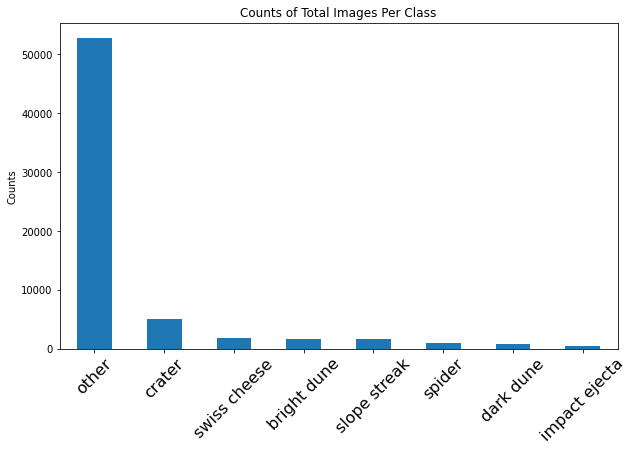

In [ ]:
# No of images per class
# Create a DataFrame
df = pd.DataFrame()
df["total_labels"] = labels

# display training labels information
df.total_labels.value_counts().plot.bar(figsize=(10, 6))
plt.xticks(rotation=45, fontsize=16)
plt.title("Counts of Total Images Per Class")
plt.ylabel("Counts")
plt.show()

### Whole Training Data With Given Splits

In [ ]:
# verify total files in new directories
trainImages = list(paths.list_images("/content/splitted_data/train"))
valImages = list(paths.list_images("/content/splitted_data/val"))
testImages = list(paths.list_images("/content/splitted_data/test"))

# print
print("Total Training Images:", len(trainImages))
print("Total Validation Images:", len(valImages))
print("Total Test Images:", len(testImages))
print("Total Images:", len(trainImages) + len(valImages) + len(testImages))

Total Training Images: 48979
Total Validation Images: 14175
Total Test Images: 1793
Total Images: 64947


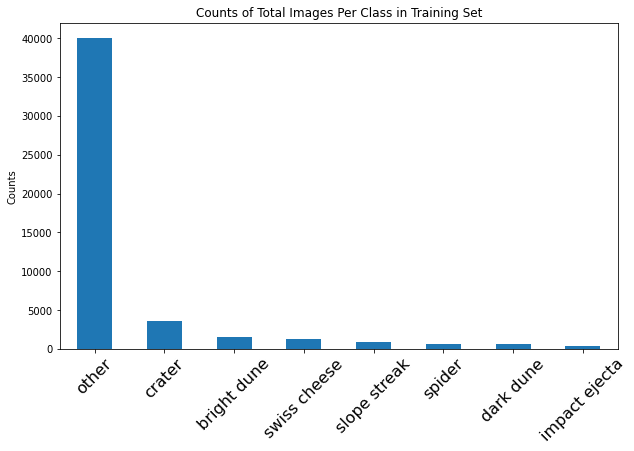

In [ ]:
# More Details about class distribution using plot
import pandas as pd

trainLabels = [p.split(os.path.sep)[-2] for p in trainImages]
valLabels = [p.split(os.path.sep)[-2] for p in valImages]
testLabels = [p.split(os.path.sep)[-2] for p in testImages]

# Create a DataFrame
train_df1 = pd.DataFrame()
val_df1 = pd.DataFrame()
test_df1 = pd.DataFrame()

train_df1["train_labels"] = trainLabels
val_df1["val_labels"] = valLabels
test_df1["test_labels"] = testLabels

# display training labels information
train_df1.train_labels.value_counts().plot.bar(figsize=(10, 6))
plt.xticks(rotation=45, fontsize=16)
plt.title("Counts of Total Images Per Class in Training Set")
plt.ylabel("Counts")
plt.show()

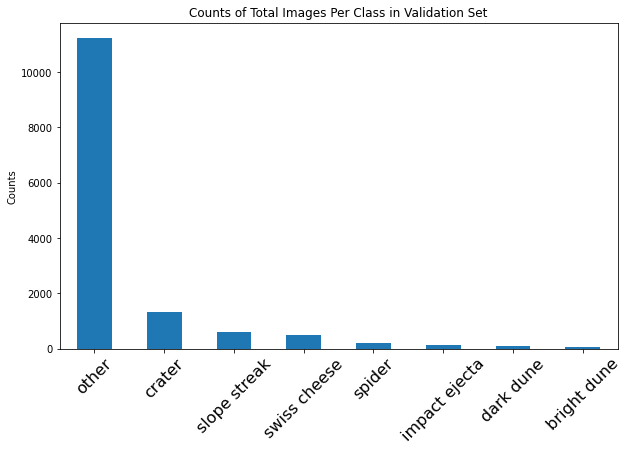

In [ ]:
# display validation labels information
val_df1.val_labels.value_counts().plot.bar(figsize=(10, 6))
plt.xticks(rotation=45, fontsize=16)
plt.title("Counts of Total Images Per Class in Validation Set")
plt.ylabel("Counts")
plt.show()

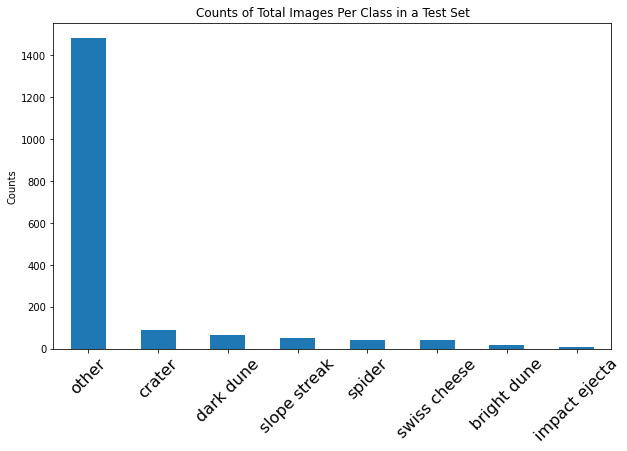

In [ ]:
# display training labels information
test_df1.test_labels.value_counts().plot.bar(figsize=(10, 6))
plt.xticks(rotation=45, fontsize=16)
plt.title("Counts of Total Images Per Class in a Test Set")
plt.ylabel("Counts")
plt.show()

**Remove all unnecessary datas which were loaded into colab disk**

In [ ]:
!rm -f -r /content/hirise-map-proj-v3_2
!rm -f -r /content/msl-labeled-data-set-v2.1

print("[INFO] Done...")

[INFO] Done...


# Custom Model 1
## Dataset Used: **train_test_split**
Augmented-images from "other" category are excluded.

In the above graphs, one thing sticks out- the classes are imbalanced and the "other" class is disproportionately large as comapred the the minority classes. This poses to be the biggest problem that we have to tackel with our data. Imbalanced classes affect the performance as standard classifiers assume a relatively balanced class distribution and optimize their misclassification costs with equal weights.

Several 'class balancing' techniques are out there- from upsampling and downsampling, to SMOTE, class weights and custom loss functions and optimizers such as AdaBoost. Each of them come with their own set of advantages to disadvantages: from overfitting to lack of generalization with upsampling our data, to loss of information with downsampling. But before we get into the implementation of these techniques, it would perhaps be helpful to see how the data performs on a 'less imbalanced' data. 

The following codes will walk the reader through a simple implementation of a CNN while considering only the non-augmented data from the "other" class. We decided to do this because while the classes themseleves are imbalanced, having ~ 55k of one class out of 64K makes no sense and so we bring down the count of "other" to ~5k. Even after this, as you will see, the classes will still remain imbalanced but perhaps we can understand it better.

In [ ]:
# verify total files in new directories
trainImages = list(paths.list_images("/content/train_test_split/train"))
valImages = list(paths.list_images("/content/train_test_split/val"))
testImages = list(paths.list_images("/content/train_test_split/test"))

# print
print("Total Training Images:", len(trainImages))
print("Total Validation Images:", len(valImages))
print("Total Test Images:", len(testImages))
print("Total Images:", len(trainImages) + len(valImages) + len(testImages))

Total Training Images: 14677
Total Validation Images: 4557
Total Test Images: 1793
Total Images: 21027


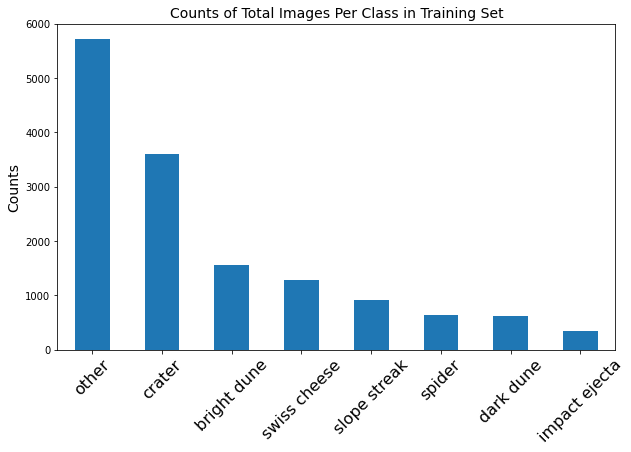

In [ ]:
# More Details
import pandas as pd
import matplotlib.pyplot as plt

trainLabels = [p.split(os.path.sep)[-2] for p in trainImages]
valLabels = [p.split(os.path.sep)[-2] for p in valImages]
testLabels = [p.split(os.path.sep)[-2] for p in testImages]

# Create a DataFrame
train_df = pd.DataFrame()
val_df = pd.DataFrame()
test_df = pd.DataFrame()

train_df["train_labels"] = trainLabels
val_df["val_labels"] = valLabels
test_df["test_labels"] = testLabels

# display training labels information
train_df.train_labels.value_counts().plot.bar(figsize=(10, 6))
plt.xticks(rotation=45, fontsize=16)
plt.title("Counts of Total Images Per Class in Training Set", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.show()

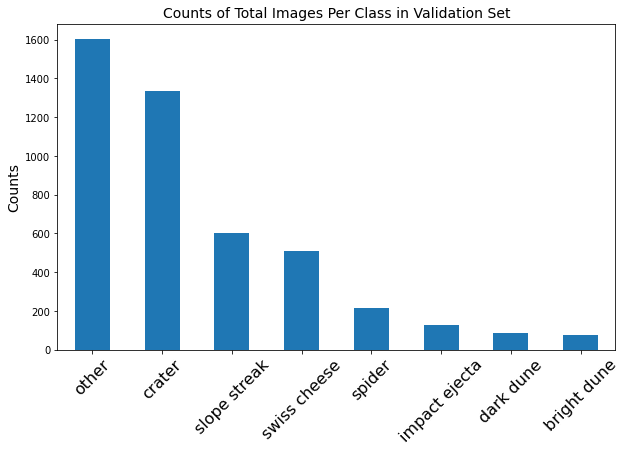

In [ ]:
# display validation labels information
val_df.val_labels.value_counts().plot.bar(figsize=(10, 6))
plt.xticks(rotation=45, fontsize=16)
plt.title("Counts of Total Images Per Class in Validation Set", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.show()

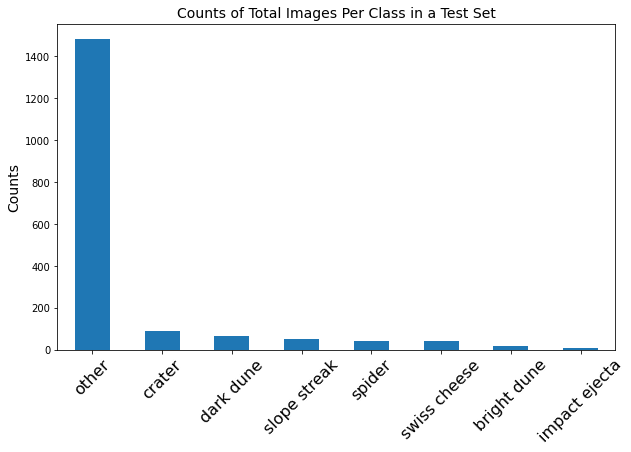

In [ ]:
# display training labels information
test_df.test_labels.value_counts().plot.bar(figsize=(10, 6))
plt.xticks(rotation=45, fontsize=16)
plt.title("Counts of Total Images Per Class in a Test Set", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.show()

In [ ]:
# Create train, val, and test data generators
trainGen = ImageDataGenerator(rescale=1./255)
valGen = ImageDataGenerator(rescale=1./255)
testGen = ImageDataGenerator(rescale=1./255)

train_generator = trainGen.flow_from_directory("/content/train_test_split/train", batch_size=32, target_size=(227, 227),class_mode="categorical",
    shuffle=True)
val_generator = valGen.flow_from_directory("/content/train_test_split/val", batch_size=32, target_size=(227, 227),class_mode="categorical",
    shuffle=True)
test_generator = testGen.flow_from_directory("/content/train_test_split/test", batch_size=1, target_size=(227, 227),class_mode='categorical',
    shuffle=False)

Found 14677 images belonging to 8 classes.
Found 4557 images belonging to 8 classes.
Found 1793 images belonging to 8 classes.


In [ ]:
## Build model architecture ##

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',input_shape=(227,227,3)),
  tf.keras.layers.MaxPooling2D((2,2), strides=2),
  tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2), strides=2),
  tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2), strides=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(8, activation='softmax'), # final layer with node for each classification
])

# display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 227, 227, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 113, 113, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 113, 113, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0

In [ ]:
# Compile the model
model.compile(optimizer = 'adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
###                 TRAIN THE MODEL                   ###
#specify training metadata
BATCH_SIZE = 32

# train the model on the training data
num_epochs = 30
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = val_generator.n//val_generator.batch_size

In [ ]:
# Define callbacks for saving best model on epoch end and early stopping.

# define directory to save best model
best_model_file = "/content/models/hirisenet_weights.hdf5"

# define model checkpoint callback
modelCheckpointCB = [ModelCheckpoint(best_model_file, monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)]
# define early stopping callback
earlyStopCB = [EarlyStopping(monitor='val_accuracy', patience=10, mode='auto', min_delta=1, restore_best_weights=True)]

callbacks = [earlyStopCB, modelCheckpointCB]

# use class weights to penalize/encourage model when training
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(trainLabels),
                                                 trainLabels)
class_weights = dict(enumerate(class_weights))


# train the model
print("[INFO] Training the model...")
history = model.fit(train_generator,
              steps_per_epoch  = STEP_SIZE_TRAIN,
              validation_data  = val_generator,
              validation_steps = STEP_SIZE_VALID,
              epochs = num_epochs,
              batch_size = BATCH_SIZE, #accuracy worse with class_weights. Should still include?
              callbacks = callbacks,
              verbose=0) 
print("Done!")

Done!


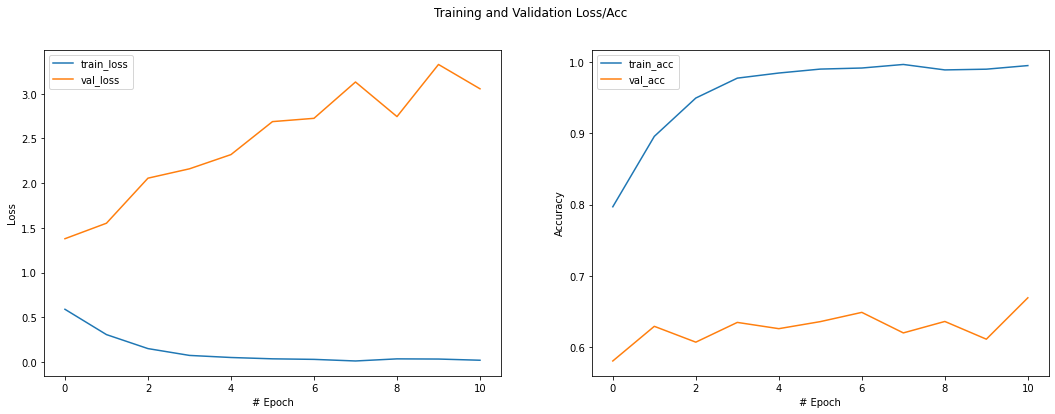

In [ ]:
# plot loss and accuracy for both training and validation
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
ax[0].plot(history.history["loss"], label="train_loss")
ax[0].plot(history.history["val_loss"], label="val_loss")
ax[0].set_xlabel("# Epoch")
ax[0].set_ylabel("Loss")

ax[1].plot(history.history["accuracy"], label="train_acc")
ax[1].plot(history.history["val_accuracy"], label="val_acc")
ax[1].set_xlabel("# Epoch")
ax[1].set_ylabel("Accuracy")

ax[0].legend()
ax[1].legend()
fig.suptitle("Training and Validation Loss/Acc")
plt.show()

### Load the best model

In [ ]:
# load model weights
model.load_weights("/content/drive/MyDrive/Project-Mars/best_models/hirisenet_weights.hdf5")

In [ ]:
###             EVALUATE MODEL ACCURACY               ###
val_acc = model.evaluate(val_generator,steps=STEP_SIZE_VALID, verbose=0)[1]
print("Validation Accuracy: {:.2f}%".format(val_acc*100))

# evaluate the model on a test set
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size 
test_acc = model.evaluate(test_generator,steps=STEP_SIZE_TEST, verbose=0)[1]
print("Test Accuracy: {:.2f}%".format(test_acc*100))

Validation Accuracy: 58.03%
Test Accuracy: 80.31%


While the validation accuracy tanked, the test accuracy is surprisingly good. But one cannot trust a test accuracy with multi-classification probelms. One of the performance metrics to use in such situations is a classification report so that we get a sense of how each of the classes are labelled.

In [ ]:
#predict on the model
test_generator.reset()
pred=model.predict(test_generator,steps=STEP_SIZE_TEST)

# define class names
class_names = list(test_generator.class_indices.keys())

# Display Classification report
print(classification_report(test_generator.classes, pred.argmax(axis=1), target_names=class_names))

               precision    recall  f1-score   support

  bright dune       0.19      0.81      0.30        16
       crater       0.55      0.47      0.51        89
    dark dune       0.48      0.79      0.59        66
impact ejecta       0.22      0.29      0.25         7
        other       0.92      0.88      0.90      1482
 slope streak       0.25      0.35      0.29        49
       spider       0.00      0.00      0.00        42
 swiss cheese       0.52      0.38      0.44        42

     accuracy                           0.80      1793
    macro avg       0.39      0.50      0.41      1793
 weighted avg       0.83      0.80      0.81      1793



From the classification report, it becomes evident that our test accuracy owes its performance to the correct labelling of "other". This isn't very surprising given that it is by far the majority class in our data and strongly influences the outcome of our results. But what is pleasantly surprising is that this simple nine layered CNN  did a decent job of correctly labelling the minority classes while not surpassing the test accuracy of the paper by Lu et al. But ofc we have to keep in mind that a good test accuracy doesn't have to mean anything as is eveident from our problem. 

We also performed a small test using class_weights. "Class_weights" is analog to weighted average in the sense that it allows the user to apply weights to each class based on the class count when fitting the model to the data. The weights are computed as follows:  n_samples/( n_classes x class_count ). Each class is weighted based on the total number of samples, the number of classes and the samples in each class to bias the cost towards those classes that have fewer examples in the training dataset. This is generally called cost-sensitive learning.

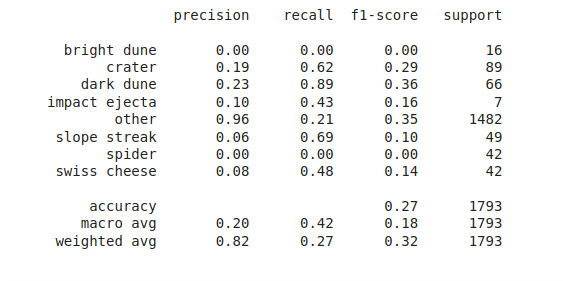

Not really sure if this worked or not. In one hand, the the test accuracy is horrendous while on the other hand, perhaps it is a true reflection of the performance of our data since our model did a terrible job of classifying the data and it shows us exactly that. But the point of using class weights was to penalize the cost function when training on the data so that our test accuracy would improve. This did not happen. Could be that in our case, class weights do more damamge than help. But as our understanding on this particular subject is minimal, we cannot comment on it further. 

# Preprocessing Dataset for Custom Model 2:



The dataset we downloaded was already split into train, validation and test classes to ensure that landmark images from the same source image did not appear in more than one dataset. 

For this experiment, we not only take the non-augmented images from "other" class but also merge the train and validation set and do a stratified split to see if anything changes. If an increase in validation accuracy is seen, then this will not be attributed to the stratified splitting as there is no reason why that should be the case. In fact, we could possibly be introducing biases by changing the pre-defined splits. 

In [ ]:
updatedImages = list(paths.list_images("/content/dataset/"))
# print
print("Total Images:", len(updatedImages))

Total Images: 21027


## DataSet Writer
*This is a Python class named HDF5DatasetWriter, which as the name suggests, is responsible for taking an input set of NumPy arrays (whether features, raw images, etc.)* and writing them to HDF5 format.

- The constructor to HDF5DatasetWriter accepts four parameters, two of which are optional.
- The dims parameter controls the dimension of the shape of the data we will be storing in the dataset (e.g, (20000, 784), (10000, 32, 32, 3), etc.)
- outputPath is where our output HDF5 file will be stored on a disk.
- dataKey parameter is the name of the dataset that will store the data
- bufSize controls the size of our in-memory buffer, which we default to 1,000 feature vectors/images. Once we reach bufSize, we'll flush the bufer to the HDF5 dataset.

In [ ]:
import h5py
import os

class HDF5DatasetWriter:
	def __init__(self, dims, outPath, dataKey="images",
		bufSize=1000):
		# check to see if the output path exists, and if so,
		# raise an exception
		if os.path.exists(outPath):
			raise ValueError("The supplied 'outPath' already"
				"exists and cannot be overwritten. Manually delete"
				" the file before continuing.", outPath)

		# open the HDF5 database for writing and create two datasets:
		# one to store the images/features and another to store the 
		# class labels
		self.db = h5py.File(outPath, "w")
		self.data = self.db.create_dataset(dataKey, dims,
			dtype="float")
		self.labels = self.db.create_dataset("labels", 
			(dims[0],), dtype="int")

		# store the buffer size, then initialize the buffer itself
		# along with the index into the datasets
		self.bufSize = bufSize
		self.buffer = {"data": [], "labels": []}
		self.idx = 0

	# function to add data to buffer
	def add(self, rows, labels):
		# add the rows and labels to the buffer
		self.buffer["data"].extend(rows)
		self.buffer["labels"].extend(labels)

		# check to see if the buffer needs to be flushed to disk
		if len(self.buffer["data"]) > self.bufSize:
			self.flush()

	# define flush method
	def flush(self):
		# write buffers to disk then reset the buffer
		i = self.idx + len(self.buffer["data"])
		self.data[self.idx:i] = self.buffer["data"]
		self.labels[self.idx:i] = self.buffer["labels"]
		self.idx = i
		self.buffer = {"data": [], "labels": []}

	def storeClassLabels(self, classLabels):
		# create a dataset to store the actual class label names,
		# then store the class labels
		dt = h5py.special_dtype(vlen=str)
		labelSet = self.db.create_dataset("label_names",
			(len(classLabels),), dtype=dt)
		labelSet[:] = classLabels

	def close(self):
		# check to see if there are any other entries in the buffer
		# that need to be flushed to disk
		if len(self.buffer["data"]) > 0:
			self.flush()

		# close the dataset
		self.db.close()

## Build HDF5 data from HiRISE datset
*This will build three HDF5 files in /content/hdf5 directory:*
- Training Set
- Validation Set
- Test Set (Untouched)

In [ ]:
# create hdf5 directory to store HDF5 files on Colab
os.mkdir("/content/hdf5")

In [ ]:
# import the necessary packages
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imutils import paths
import progressbar
import json
import cv2
import os
import numpy as np

# grab the paths to the train_val images
trainPaths = list(paths.list_images("/content/dataset/train_val/"))
trainLabels = [p.split(os.path.sep)[-2]
				for p in trainPaths]
le = LabelEncoder()
trainLabels = le.fit_transform(trainLabels)

# split train into train and validation
split = train_test_split(trainPaths, trainLabels, test_size=2000, random_state=42, stratify=trainLabels)

(trainPaths, valPaths, trainLabels, valLabels) = split

# grab the paths to the test images
testPaths = list(paths.list_images("/content/dataset/test/"))
testLabels = [p.split(os.path.sep)[-2]
				for p in testPaths]
testLabels = le.transform(testLabels)

# construct a list pairing the training, validation, and testing
# image paths along with their corresponding labels and output
# HDF5 files
datasets = [("train", trainPaths, trainLabels, "/content/hdf5/train.hdf5"),
			("val", valPaths, valLabels, "/content/hdf5/val.hdf5"),
			("test", testPaths, testLabels, "/content/hdf5/test.hdf5")]

# loop over the dataset tuples
for (dType, paths, labels, outputPath) in datasets:
  # create HDF5 writer
  print("[INFO] building {}...".format(outputPath))
  writer = HDF5DatasetWriter((len(paths), 227, 227, 3), outputPath)
  writer.storeClassLabels(le.classes_)

	# initialize the progress bar
  widgets = ["Building Dataset:", progressbar.Percentage(), " ", progressbar.Bar(), " ", progressbar.ETA()]

  pbar = progressbar.ProgressBar(maxval=len(paths), widgets=widgets).start()

	# loop over the image paths
  for (i, (path, label)) in enumerate(zip(paths, labels)):
    # load the image and process it
    image = cv2.imread(path)
    # add image and label to the HDF5 dataset
    writer.add([image], [label])
    pbar.update(i)

  # close the HDF5 writer
  pbar.finish()
  writer.close()

Building Dataset:  0% |                                        | ETA:   0:00:11

[INFO] building /content/hdf5/train.hdf5...


Building Dataset:100% |########################################| Time:  0:08:19
Building Dataset:  5% |##                                      | ETA:   0:00:02

[INFO] building /content/hdf5/val.hdf5...


Building Dataset:100% |########################################| Time:  0:00:36
Building Dataset:N/A% |                                        | ETA:  --:--:--

[INFO] building /content/hdf5/test.hdf5...


Building Dataset:100% |########################################| Time:  0:00:35


## We have four custom preprocessing classes inside custom preprocessing module:
- **SimplePreprocessor**: resizes the input images to M x N size.
- **PatchPreprocessor**: used to randomly extract M x N (200 x 200, in our case) pixel regions from an image during training.
- **CropPreprocessor**: an over-sampling preprocessor used at testing time to sample five regions of an input image ( the four corners + center area) along with their corresponding horizontal flips (for a total of 10 crops).
- **Normalizer** : normalizes the input image.

*During prediction we will pass the 10 crops through our CNN and then average across the 10 predictions.*


## Dataset Generator
*This DatasetGenerator class is responsible for yielding batches of images and labels from our HDF5 dataset to the Keras fit function when training a network.*
This is somewhat similar to Keras `ImageDataGenerator`.

This class accepts a number of arguments, two of which are requiered and rest optional:

- **dbPath**: The path to our HDF5 dataset that stores our images and corresponding class labels.
- **batchSize**: The size of mini-batches to yield when training our network.
- **preprocessors**: The list of image preprocessors we are going to apply (i.e. the custom preprocessors we discussed above)
- **aug**: Default is None, we could also supply Keras ImageDataGenerator to apply data augmentation directly inside our HDF5DatasetGenerator.
- **binarize**: This indicates whether or not binarization (one-hot-encoding) of labels needs to take place (Default value: True).
- **classes**: The number of unique class labels in our dataset. This value is required to accurately construct our one-hot-encoded vectors during the binarization process.

In [ ]:
# import the necessary packages
import numpy as np 
import h5py
from tensorflow.keras.utils import to_categorical

class HDF5DatasetGenerator:
	def __init__(self, dbPath, batchSize, preprocessors=None,
		aug=None, binarize=True, classes=8):
		# store the batch size, preprocessors, and data augmentor,
		# whether or not the labels should be binaried, along with
		# the total number of classes
		self.binarize = binarize
		self.batchSize = batchSize
		self.aug = aug
		self.preprocessors = preprocessors
		self.classes = classes

		# open the HDF5 database for reading and determine the total
		# number of entries in the database
		self.db = h5py.File(dbPath, "r")
		self.numImages = self.db["labels"].shape[0]

	def generator(self, passes=np.inf):
		# initialize the epoch count
		epochs = 0

		# keep looping infinitely -- the model will stop once we have
		# reach the desired number of epochs
		while epochs < passes:
			# loop over the HDF5 dataset
			for i in np.arange(0, self.numImages, self.batchSize):
				# extract the images and labels from the HDF dataset
				images = self.db["images"][i: i + self.batchSize]
				labels = self.db["labels"][i: i + self.batchSize]

				# check to see if the labels should be binarized
				if self.binarize:
					labels = to_categorical(labels, num_classes=self.classes)

				# check to see if our preprocessors are not None
				if self.preprocessors is not None:
					# initialize the list of processed images
					procImages = []

					# loop over the images
					for image in images:
						# loop over the preprocessors and apply each
						# to the image
						for p in self.preprocessors:
							image = p.preprocess(image)

						# update the list of processed images
						procImages.append(image)

					# update the images array to be processed images
					images = np.array(procImages)

				# if the data augmentator exists, apply it
				if self.aug is not None:
					(images, labels) = next(self.aug.flow(images,
						labels, batch_size=self.batchSize))

				# yield a tuple of images and labels
				yield (images, labels)

			# increment the total number of epochs
			epochs += 1


	def close(self):
		# close the database
		self.db.close()

# Custom CNN Model 2:

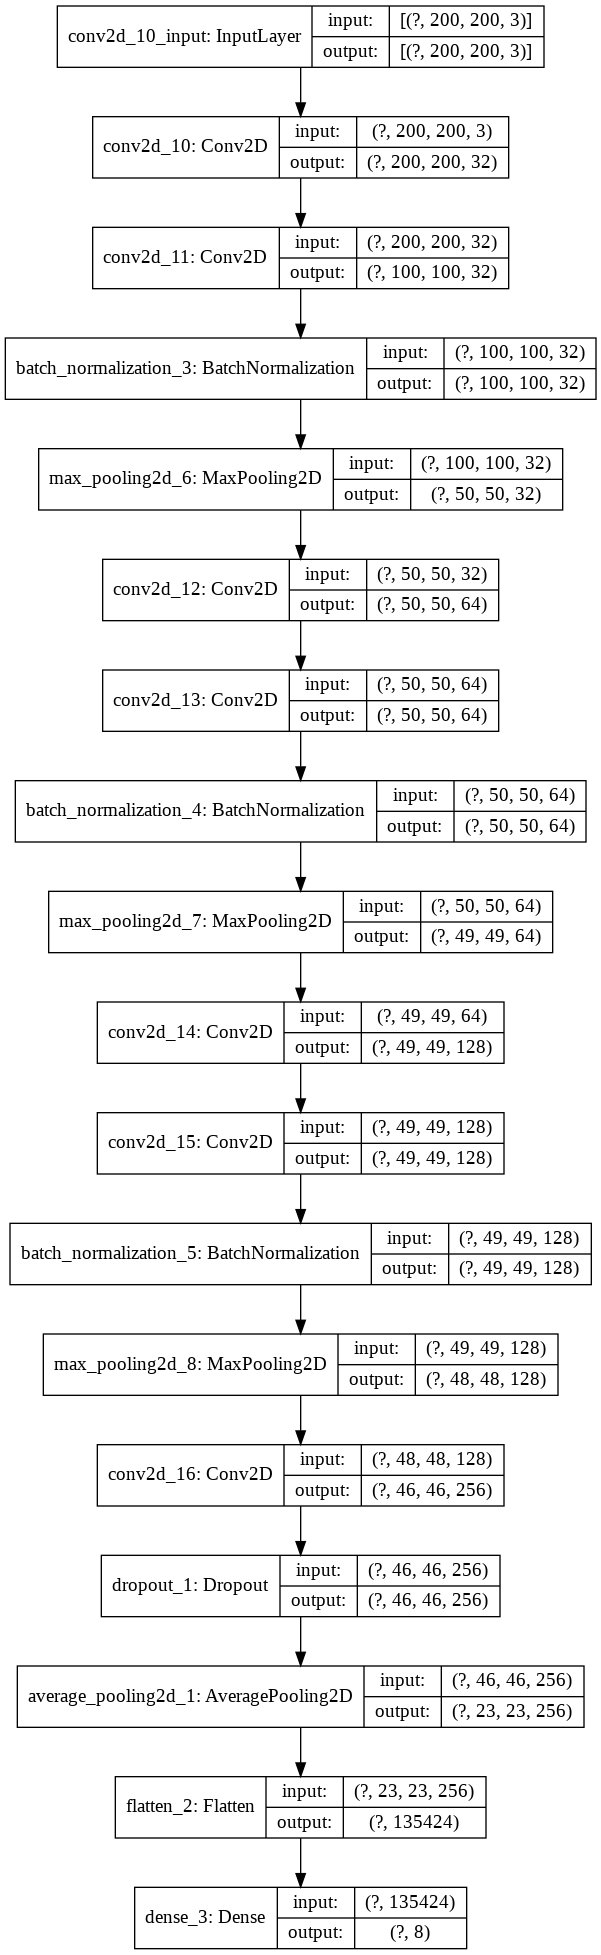

In [ ]:
# import the necessary packages
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import BatchNormalization, Dropout, Input, AveragePooling2D
from keras.models import Sequential, Model
from tensorflow.keras.regularizers import l2

class MarsNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model and input shape
        model = Sequential()
        inputShape = (height, width, depth)
        # First Block: CONV => CONV => BN => POOL
        model.add(Conv2D(32, 3, activation="relu", padding="same", input_shape=inputShape))
        model.add(Conv2D(32, 3, strides=2, activation="relu", padding="same"))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(2))
        # Second Block: CONV => CONV => BN => POOL
        model.add(Conv2D(64, 3, activation="relu", padding="same"))
        model.add(Conv2D(64, 3, activation="relu", padding="same"))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(2, strides=1))
        # Third Block: CONV => CONV => BN => POOL
        model.add(Conv2D(128, 3, activation="relu", padding="same"))
        model.add(Conv2D(128, 3, activation="relu", padding="same"))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(2, strides=1))
        # Final Conv Block: CONV => DROP => AVGPOOL
        model.add(Conv2D(256, 3, activation="relu", padding="valid"))
        model.add(Dropout(0.3))
        model.add(AveragePooling2D(2))
        
        # Flatten and softmax classifier
        model.add(Flatten())
        model.add(Dense(classes, activation="softmax"))
        
        # return the model
        return model

In [ ]:
# create a custom callback class which will save the model whenever the validation loss is minimum
from tensorflow.keras.callbacks import BaseLogger
from keras.callbacks import LearningRateScheduler
import numpy as np

class SaveModel(BaseLogger):
  def __init__(self, path):
    # save model path and define max accuracy(if our model gets accuracy higher than this: the model will be saved in the drive)
    super(SaveModel, self).__init__()
    self.path = path
    self.max_acc = .60

  def on_epoch_end(self, epoch, logs={}):
    # loop over the logs and update the loss, accuracy, etc.
    # for the entire training process
    if logs["val_accuracy"] > self.max_acc:
      print("\n[**INFO**] Validation acc increased to {:.4f}, saving the model...\n".format(logs["val_accuracy"]))
      model.save(self.path)
      self.max_acc = logs["val_accuracy"]

# create a learning rate scheduler callback
# define total number of epoch to train for along with the initial lr
NUM_EPOCHS = 70
INIT_LR = 1e-2

def poly_decay(epoch):
  # initialize the max number of epochs, base lr and the power of polynomial
  maxEpochs = NUM_EPOCHS
  baseLR = INIT_LR
  power = 1.0 # linear

  # compute the new learning rate based on polynomial decay
  alpha = baseLR * (1 - (epoch / float(maxEpochs))) ** power
  # return the learining rate
  return alpha
      
# define a path to save the model
model_path = "/content/drive/MyDrive/Project-Mars/marsnet_model.h5"
callbacks = [SaveModel(model_path), LearningRateScheduler(poly_decay)]

## Prepare Data Generators and Train the Network

In [ ]:
# import necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from preprocessing import Normalizer, ImageToArrayPreprocessor, SimplePreprocessor, PatchPreprocessor
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import json
import keras
import os

# construct the training image generator for the data augmentation
aug = ImageDataGenerator(zoom_range=0.15,
						 width_shift_range=0.2, height_shift_range=0.2,
						 shear_range=0.15, horizontal_flip=True,
						 fill_mode="nearest")


# initialize the image preprocessors
sp = SimplePreprocessor(200, 200)
pp = PatchPreprocessor(200, 200)
nor = Normalizer()
iap = ImageToArrayPreprocessor()

# initialize the training and validation dataset generators
trainGen = HDF5DatasetGenerator("/content/hdf5/train.hdf5", 64, aug=aug,
								preprocessors=[pp, nor, iap], classes=8)

valGen = HDF5DatasetGenerator("/content/hdf5/val.hdf5", 64, aug=aug,
								preprocessors=[sp, nor, iap], classes=8)

# initialize the optimizer
print("[INFO] compiling model...")
opt = keras.optimizers.SGD(INIT_LR)
model = MarsNet.build(width=200, height=200, depth=3,
	classes=8)
model.compile(loss="categorical_crossentropy", optimizer=opt,
			  metrics=["accuracy"])

# train the network
model.fit(trainGen.generator(passes=70),
					steps_per_epoch=trainGen.numImages // 64,
					validation_data=valGen.generator(passes=70),
					validation_steps=valGen.numImages // 64,
					epochs=NUM_EPOCHS,
					max_queue_size=64 * 2,
					callbacks=callbacks,
          verbose=1)

# close the HDF5 datasets
trainGen.close()
valGen.close()

[INFO] compiling model...


## Evaluate On a Test Set

In [ ]:
from keras.models import load_model

# load the best performing model
l_model = load_model("/content/drive/MyDrive/Project-Mars/best_models/marsnet_model-3-u1.h5")
# initialize the test generator
testGen = HDF5DatasetGenerator("/content/hdf5/test.hdf5", 64,
								preprocessors=[sp, nor, iap], classes=8)
test_acc = l_model.evaluate(testGen.generator(passes=1), verbose=0)[1]
print("Test Accuracy: {:.2f}%".format(test_acc*100))

Test Accuracy: 84.27%


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# get predictions
preds = l_model.predict(testGen.generator(passes=1))

# get the true labels
labels = testGen.db["labels"]

# print classification_report
print("*********************** CLASSIFICATION REPORT ***************************\n")
print(classification_report(labels, preds.argmax(axis=1), 
                            target_names=testGen.db["label_names"]))

*********************** CLASSIFICATION REPORT ***************************

               precision    recall  f1-score   support

  bright dune       0.65      0.94      0.77        16
       crater       0.46      0.58      0.51        89
    dark dune       0.66      0.82      0.73        66
impact ejecta       0.17      0.71      0.28         7
        other       0.95      0.88      0.91      1482
 slope streak       0.35      0.76      0.47        49
       spider       0.48      0.31      0.38        42
 swiss cheese       0.89      0.74      0.81        42

     accuracy                           0.84      1793
    macro avg       0.58      0.72      0.61      1793
 weighted avg       0.88      0.84      0.85      1793



## Evaluate Using CropPreprocessor

In [ ]:
# import crop preprocessor class
from preprocessing import CropPreprocessor

# initialize crop preprocessor
cp = CropPreprocessor(200, 200)

# reinitialize the testing set genertor, this time excluding 'SimplePreprocessor'
testGen = HDF5DatasetGenerator("/content/hdf5/test.hdf5", 64, preprocessors=[nor], classes=8)
predictions = []

# initialize the progressbar
# initialize the progress bar
widgets = ["Evaluating: ", progressbar.Percentage(), " ",
progressbar.Bar(), " ", progressbar.ETA()]

pbar = progressbar.ProgressBar(maxval=testGen.numImages // 64, widgets=widgets).start()

# loop over a single pass of the test data
for (i, (images, labels)) in enumerate(testGen.generator(passes=1)):
  # loop over each of the individual images
  for image in images:
    # apply the crop preprocessor to the image to generate 10
    # separate crops, then convert them from images to arrays
    crops = cp.preprocess(image)
    crops = np.array([iap.preprocess(c) for c in crops],
    dtype="float32")

    # make predictions on the crops and then average them
    # together to obtain the final prediction
    pred = l_model.predict(crops)
    predictions.append(pred.mean(axis=0))

  # update the progressbar
  pbar.update(i)
pbar.finish()


Evaluating: 100% |#############################################| Time:  0:01:28


In [ ]:
# calculate crop accuracy on the test set predictions
crop_acc = accuracy_score(testGen.db["labels"], np.array(predictions).argmax(axis=1))
print("Test Accuracy Including With Crop: {:.2f}%".format(crop_acc*100))

Test Accuracy Including With Crop: 85.72%


In [ ]:
# Display Classification Report

print("\t\t********** CLASSIFICATION REPORT ********\n")
print(classification_report(testGen.db["labels"], np.array(predictions).argmax(axis=1),
                            target_names=testGen.db["label_names"]))

		********** CLASSIFICATION REPORT ********

               precision    recall  f1-score   support

  bright dune       0.70      1.00      0.82        16
       crater       0.51      0.61      0.55        89
    dark dune       0.71      0.83      0.77        66
impact ejecta       0.17      0.71      0.28         7
        other       0.95      0.89      0.92      1482
 slope streak       0.37      0.78      0.50        49
       spider       0.57      0.29      0.38        42
 swiss cheese       0.89      0.74      0.81        42

     accuracy                           0.86      1793
    macro avg       0.61      0.73      0.63      1793
 weighted avg       0.89      0.86      0.87      1793



We can see that our accuracy increased from 80 percent to 84 percent with new training method and new model architecture which is deeper than previous architecture but have less number of trainable parameters (by replacing dense layer with AveragePoolingLayer). Also this time, instead of using entire image (227x227px) during training, we instead crop a random portion of it (200x200px) and pass it to the network. The PatchPreprocessor is responsible for randomly sampling 200x200 regions of an image during training. This way we can help reduce overfitting. Applying this cropping implies that a network never sees the exact same image, similar to data augmentation.

Further we applied the 10-crop over-sampling method on the testing set and we are able to boost classification accuracy to 85.72%, an increase of 1.7%, which this was all accomplished simply by taking multiple crops of the input image and averaging the results.

# ResNet50 as a Feature Extractor
We will pass an image through the ResNet50 and extract the features from the final POOL layer.
The final average pooling layer of ResNet50 is 2048-d, so, each of the images passed through it will have 2048 features. We will extract features from all of the images and store it in a HDF5 file and then will train a Logistic Regression Classifier. We will also upsample the minority classes using SMOTE before training. 

*We will use the same `HDF5DatasetWriter` class as before but this time we will store the features extracted from `ResNet50` model instead of storing raw images.*

In [ ]:
from keras.applications import ResNet50
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import progressbar
import random
import os

# initialize the ResNet50 model
model = ResNet50(weights="imagenet", include_top=False, pooling="avg")

# grab the paths to the train_val images
trainPaths = list(paths.list_images("/content/dataset/train_val/"))
trainLabels = [p.split(os.path.sep)[-2]
				for p in trainPaths]
le = LabelEncoder()
trainLabels = le.fit_transform(trainLabels)

# split train into train and validation
split = train_test_split(trainPaths, trainLabels, test_size=2000, random_state=42, stratify=trainLabels)

(trainPaths, valPaths, trainLabels, valLabels) = split

# grab the paths to the test images
testPaths = list(paths.list_images("/content/dataset/test/"))
testLabels = [p.split(os.path.sep)[-2]
				for p in testPaths]
testLabels = le.transform(testLabels)


# construct a list pairing the training, validation, and testing
# image paths along with their corresponding labels and output
# HDF5 files
datasets = [("train", trainPaths, trainLabels, "/content/hdf5/train_features.hdf5"),
			("val", valPaths, valLabels, "/content/hdf5/val_features.hdf5"),
            ("test", testPaths, testLabels, "/content/hdf5/test_features.hdf5")]

# initialize the batch size
bs = 32

# loop over the daaset tuples
for (dType, paths, labels, outputPath) in datasets:
    # create HDF5 writer
    print("[INFO] building {}...".format(outputPath))
    writer = HDF5DatasetWriter((len(paths), 2048), outputPath, dataKey="features")
    writer.storeClassLabels(le.classes_)

    # initialize the progress bar
    widgets = ["Building Dataset:", progressbar.Percentage(), " ",
    progressbar.Bar(), " ", progressbar.ETA()]

    pbar = progressbar.ProgressBar(maxval=len(paths), widgets=widgets).start()

    # loop over the images in patches
    for i in np.arange(0, len(paths), bs):
        # extract the batch of images and labels, then initialize the
        # list of actual images that will be passed through the network
        # for feature extraction
        batchPaths = paths[i:i + bs]
        batchLabels = labels[i:i + bs]
        batchImages = []

        # loop over the images and labels in the current batch
        for (j, imagePath) in enumerate(batchPaths):
            # load the input image using keras helper utility
            # while ensuring the image is resized to 224x224 pixels
            image = load_img(imagePath, target_size=(224, 224))
            image = img_to_array(image)

            # preprocess the image by (1) expanding the dimensions and
            # (2) subtracting the mean RGB pixel intensity from the 
            # imagenet dataset
            image = np.expand_dims(image, axis=0)
            image = imagenet_utils.preprocess_input(image)

            # add the image to the batch
            batchImages.append(image)

        # pass the image through the network and use the outputs as
        # oour actual features
        batchImages = np.vstack(batchImages)
        features = model.predict(batchImages, batch_size=bs)

        # reshape the features so that each image is represented by
        # a flattened feature vector of the 'MaxPooling2D' outpus
        features = features.reshape((features.shape[0], 2048))
        

        # add the features and labels to our HDF5 dataset
        writer.add(features, batchLabels)

        pbar.update(i)

    # close the HDF5 writer
    pbar.finish()
    writer.close()

Building Dataset:N/A% |                                        | ETA:  --:--:--

[INFO] building /content/hdf5/train_features.hdf5...


Building Dataset:100% |########################################| Time:  0:01:43
Building Dataset:N/A% |                                        | ETA:  --:--:--

[INFO] building /content/hdf5/val_features.hdf5...


Building Dataset:100% |########################################| Time:  0:00:11
Building Dataset:N/A% |                                        | ETA:  --:--:--

[INFO] building /content/hdf5/test_features.hdf5...


Building Dataset:100% |########################################| Time:  0:00:10


## Training a Logistic Regression Classifier

In [ ]:
# import necessary packages
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter

# disable Deprecation Warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# load the training data from the HDF5 dataset
train_data = h5py.File("/content/hdf5/train_features.hdf5", "r")

# convert it into numpy array in order to apply SMOTE
X = np.array(train_data["features"])
y = np.array(train_data["labels"])

# display the dimension
X.shape, y.shape

((17234, 2048), (17234,))

In [ ]:
# disable Future Warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# initialize SMOTE
sm = SMOTE()
# perform oversampling
X_sm, y_sm = sm.fit_resample(X, y)

# Compare before and after upsample
print("[INFO] Before Upsampling:")
print(Counter(y))
print("\n[INFO] After Upsampling:")
print(Counter(y_sm))

Before Upsampling:
Counter({4: 6559, 1: 4422, 7: 1606, 0: 1468, 5: 1367, 6: 765, 2: 627, 3: 420})

After Upsampling:
Counter({4: 6559, 1: 6559, 0: 6559, 5: 6559, 6: 6559, 7: 6559, 2: 6559, 3: 6559})


In [ ]:
# define parameters to tune
params = {"C": [0.001, 0.01, 0.1, 1.0]}

# initialize GridSearchCV
gs_model = GridSearchCV(LogisticRegression(max_iter=2000), params, cv=3, n_jobs=-1)
print("[INFO] Tuning hyperparameter...")
gs_model.fit(X_sm, y_sm)

# Best Parameters
print("[INFO] Best hyperparameter:", gs_model.best_params_)

[INFO] Tuning hyperparameter...
[INFO] Best hyperparameter: {'C': 1.0}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Display accuracy on a training set
train_preds = gs_model.predict(X_sm)
train_acc = accuracy_score(y_sm, train_preds)
print("[INFO] Training accuracy: {:.2f}%".format(train_acc*100))

[INFO] Training accuracy: 100.00%


In [ ]:
## Evaluate on Validation Set
val = h5py.File("/content/hdf5/val_features.hdf5", "r")
val_X = np.array(val["features"])
val_Y = np.array(val["labels"])

val_preds = gs_model.predict(val_X)
val_acc = accuracy_score(val_Y, val_preds)
print("[INFO] Validation accuracy: {:.2f}%".format(val_acc*100))

[INFO] Validation accuracy: 96.70%


In [ ]:
# Display classification report for validation set

print("*********** CLASSIFICATION REPORT (VALIDATION SET)************")
print(classification_report(val_Y, val_preds, target_names=val["label_names"]))

*********** CLASSIFICATION REPORT (VALIDATION SET)************
               precision    recall  f1-score   support

  bright dune       1.00      0.99      1.00       170
       crater       0.95      0.96      0.96       513
    dark dune       0.99      0.99      0.99        73
impact ejecta       0.94      0.98      0.96        49
        other       0.97      0.95      0.96       761
 slope streak       0.93      0.98      0.96       159
       spider       0.98      1.00      0.99        89
 swiss cheese       0.98      0.99      0.99       186

     accuracy                           0.97      2000
    macro avg       0.97      0.98      0.97      2000
 weighted avg       0.97      0.97      0.97      2000



In [ ]:
# Evaluate on a test set
test = h5py.File("/content/hdf5/test_features.hdf5", "r")
test_X = np.array(test["features"])
test_Y = np.array(test["labels"])

test_preds = gs_model.predict(test_X)
test_acc = accuracy_score(test_Y, test_preds)
print("[INFO] Test accuracy: {:.2f}%".format(test_acc*100))

[INFO] Test accuracy: 87.67%


In [ ]:
# Display classification report for validation set

print("*********** CLASSIFICATION REPORT (TEST SET)************")
print(classification_report(test_Y, test_preds, target_names=test["label_names"]))

*********** CLASSIFICATION REPORT (TEST SET)************
               precision    recall  f1-score   support

  bright dune       0.73      1.00      0.84        16
       crater       0.51      0.67      0.58        89
    dark dune       0.91      0.89      0.90        66
impact ejecta       0.16      0.57      0.25         7
        other       0.95      0.91      0.93      1482
 slope streak       0.42      0.71      0.53        49
       spider       0.29      0.05      0.08        42
 swiss cheese       0.95      1.00      0.98        42

     accuracy                           0.88      1793
    macro avg       0.61      0.73      0.64      1793
 weighted avg       0.89      0.88      0.88      1793



Now to increase the accuracy, we relied on transfer learning via feature extraction, specifically, the ResNet50 architecture trained on the ImageNet dataset. After extracting features using ResNet50, we trained a Logistic Regression Classifier and got the accuracy boost to 87.67 percent which is almost 2% increase.

# Transfer Learning

## Transfer Learning on HiRISE

Our Objective is to try transfer learning on state of the art architectures with the HiRISE dataset. As suggested by professor the MobileNet is our first choice. We load the model and add some layers to suit our classification.

In [ ]:
# import all the necessary packages
from PIL import Image

from matplotlib import pyplot
import matplotlib.pylab as plt 
from scipy.signal import convolve2d
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import InceptionV3

In [ ]:
# import the mobile net and do not include its top layers
base_model = MobileNetV2(include_top=False,input_shape=(224,224,3))
#base_model.summary()

We have many parameters to play with to get a good accuracy. The architecture of added layers, optimizer parameters, number of trainable layers are the most important ones and have been tuned as follows:

In [ ]:
#Use model api and add other layers on top of the base model
x=base_model.output

x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x)
x = Dropout(0.6)(x)
x=Dense(64,activation='relu')(x) 
x = Dropout(0.5)(x)
x=Dense(16,activation='relu')(x) 
x = Dropout(0.5)(x)
preds=Dense(8,activation='softmax')(x) 
model=Model(inputs=base_model.input,outputs=preds) #specify the inputs and outputs

#Freeze layers for training
for layer in model.layers[:90]:
    layer.trainable=False
#Compile model with appropriate loss, optimizer and metrics
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
#Look at the model architecture and verify
model.summary()

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________

We get the preprocess function for mobilenet and declare datagenerators for train, test and validation

In [ ]:
# Get preprocess function for mobile net
from tensorflow.keras.applications.mobilenet import preprocess_input

#Declare data generator for train, test and validation. Use it to call images in batches
datagen=ImageDataGenerator(preprocessing_function=preprocess_input) 
train_generator = datagen.flow_from_directory('/content/splitted_data/train',batch_size=512,target_size=(227,227),color_mode='rgb',shuffle=True)
val_generator = datagen.flow_from_directory('/content/splitted_data/val',batch_size=512,target_size=(227,227),color_mode='rgb',shuffle=True)
test_generator = datagen.flow_from_directory('/content/splitted_data/test',batch_size=512,target_size=(227,227),color_mode='rgb',shuffle=True)


Found 48979 images belonging to 8 classes.
Found 14175 images belonging to 8 classes.
Found 1793 images belonging to 8 classes.


We fit the data below. Regularisation was needed as we are attempting transfer learning on large dataset. Hence dropout and early stopping have been employed

In [ ]:
# Declare step size for train and validation
step_size_train=train_generator.n//train_generator.batch_size
step_size_val=val_generator.n//val_generator.batch_size

# Early Stopping callback declaration
callback = tf.keras.callbacks.EarlyStopping(patience=4,monitor='val_loss',restore_best_weights=True)

# Train the mode and store training loss and accuracy in history variable
history = model.fit(train_generator,steps_per_epoch=step_size_train,validation_data=val_generator,validation_steps=step_size_val,epochs=15,callbacks=[callback])


In [ ]:
#Save model weights for later usage
model.save_weights('mobilenet_weights.h5')

Text(0.5, 0.98, 'Transfer Training')

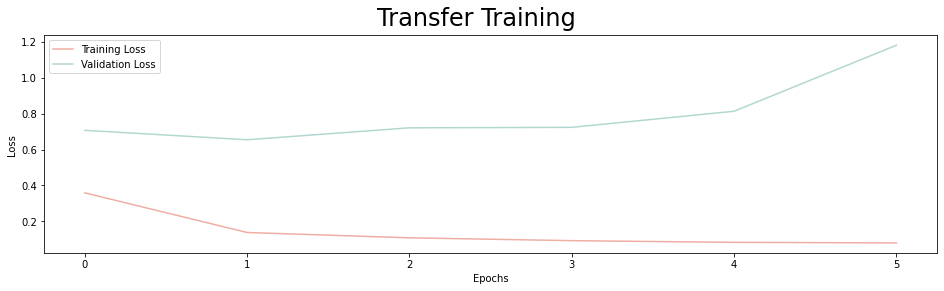

In [ ]:
# Plot Training and Validation Loss

fig, ax = plt.subplots(figsize = (16,4))
ax.plot(history.history['loss'],color='#EFAEA4',label = 'Training Loss')
ax.plot(history.history['val_loss'],color='#B2D7D0',label = 'Validation Loss')
ax.legend()
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
fig.suptitle('Transfer Training', fontsize = 24)
plt.show()

In [ ]:
# Load best model weights
model.load_weights("/content/drive/MyDrive/Project-Mars/best_models/mobilenet_weights.h5")

In [ ]:
#Take a look at performance on the tet set
print('test evaluation : ',model.evaluate(test_generator))

4/4 [==============================] - 3s 667ms/step - loss: 3.8923 - accuracy: 0.9074
test evaluation :  [3.8923165798187256, 0.9074177145957947]


Next we try transfer learning on Inception net. We again have many tunable parameters here. After experimenting with them it was found that we could freeze much more layers as compared to MobileNet. There are 2 reasons for that: 

1. The InceptionNet is deeper than Mobilenet and hence freezing more layers wil be equivalent to freezing lesser layers on MobileNet.
2. Inception learns feature representation better than Mobilenet.

In [ ]:
#Get the Inception model without the top included
base_model = InceptionV3(include_top=False,input_shape=(299,299,3))

#Using the base model declare more layers to get classification as required
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x)
x = Dropout(0.6)(x)
x=Dense(16,activation='relu')(x) 
x = Dropout(0.5)(x)
preds=Dense(8,activation='softmax')(x) 
model=Model(inputs=base_model.input,outputs=preds) #specify the inputs and outputs

#Freeze suitable number of layers, so that they are not trained
for layer in model.layers[:280]:
    layer.trainable=False

#Compile model with appropriate loss, optimizer and metric
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_97 (Conv2D)              (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_97[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

Here we generate train, test and validation daa and pre-process it according to inception's requirements.

In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input

# define train, val and test generators
datagen=ImageDataGenerator(preprocessing_function=preprocess_input) 
train_generator = datagen.flow_from_directory('/content/splitted_data/train',batch_size=512,target_size=(227,227),color_mode='rgb',shuffle=True)
val_generator = datagen.flow_from_directory('/content/splitted_data/val',batch_size=512,target_size=(227,227),color_mode='rgb',shuffle=True)
test_generator = datagen.flow_from_directory('/content/splitted_data/test',batch_size=512,target_size=(227,227),color_mode='rgb',shuffle=True)

Found 48979 images belonging to 8 classes.
Found 14175 images belonging to 8 classes.
Found 1793 images belonging to 8 classes.


Regularization was required here as was required for MobileNet. Notice that the additional layer structure has been kept same for both the models to allow for some comparison. Dropout and Earlystopping has been employed here as well.

In [ ]:
# define step sizes and callbacks
step_size_train=train_generator.n//train_generator.batch_size
step_size_val=val_generator.n//val_generator.batch_size
callback = tf.keras.callbacks.EarlyStopping(patience=4,monitor='val_loss',restore_best_weights=True)

# train the model
history = model.fit(train_generator,steps_per_epoch=step_size_train,validation_data=val_generator,validation_steps=step_size_val,epochs=15,callbacks=[callback])

Text(0.5, 0.98, 'Transfer Training')

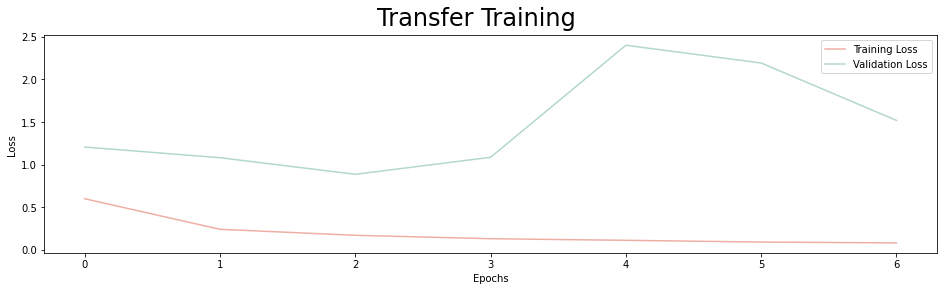

In [ ]:
fig, ax = plt.subplots(figsize = (16,4))
ax.plot(history.history['loss'],color='#EFAEA4',label = 'Training Loss')
ax.plot(history.history['val_loss'],color='#B2D7D0',label = 'Validation Loss')
ax.legend()
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
fig.suptitle('Transfer Training', fontsize = 24)

In [ ]:
# load the model weights
model.load_weights("/content/drive/MyDrive/Project-Mars/best_models/inception_weights.h5")

In [ ]:
train_acc = model.evaluate(train_generator, verbose=0)[1]
val_acc = model.evaluate(val_generator, verbose=0)[1]
test_acc = model.evaluate(test_generator, verbose=0)[1]

print("Training Accuracy: {:.2f}%".format(train_acc*100))
print("Validation Accuracy: {:.2f}%".format(val_acc*100))
print("Testing Accuracy: {:.2f}%".format(test_acc*100))

Training Accuracy: 97.98%
Validation Accuracy: 90.31%
Testing Accuracy: 91.75%


## Transfer Learning on MSL



In [ ]:
# import required modules

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
from shutil import copyfile
from imutils import paths

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

**Check images in a dataset**

In [ ]:
images = list(paths.list_images("/content/msl_splitted_data"))
images[0].split(os.path.sep)[-2]

'Wheel tracks'

In [ ]:
# verify total number of images that we will be working on
trainImages = len(list(paths.list_images("/content/msl_splitted_data/train")))
valImages = len(list(paths.list_images("/content/msl_splitted_data/validation")))
testImages = len(list(paths.list_images("/content/msl_splitted_data/test")))

# print
print("Total Training Images:", trainImages)
print("Total Validation Images:", valImages)
print("Total Test Images:", testImages)
print("Total Images:", trainImages + valImages + testImages)

Total Training Images: 5920
Total Validation Images: 300
Total Test Images: 600
Total Images: 6820


### Visualize Some Images

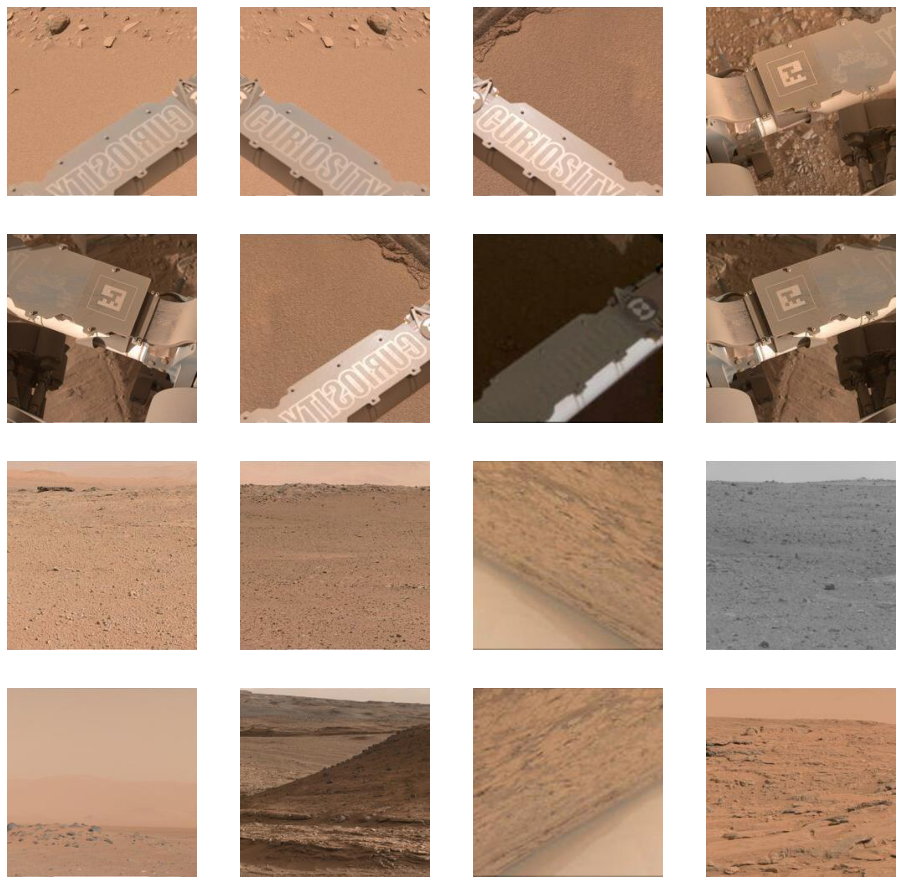

In [ ]:
# view some images in class arm cover and landscape

train1_dir = '/content/msl_splitted_data/train/Arm cover'
train2_dir = '/content/msl_splitted_data/train/Distant landscape'

train1_names = os.listdir(train1_dir)

train2_names = os.listdir(train2_dir)


# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next1_pix = [os.path.join(train1_dir, fname) 
                for fname in train1_names[pic_index-8:pic_index]]
next2_pix = [os.path.join(train2_dir, fname) 
                for fname in train2_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next1_pix+next2_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### Preprocessing Images

In [ ]:
# use imagedatagenerator and rescale the images by 1./255 for all train, test and validation data
train_datagen_vgg = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
test_datagen_vgg = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
val_datagen_vgg = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)


# Flow images in batches of 20 using data generators
train_generator_vgg = train_datagen_vgg.flow_from_directory('/content/msl_splitted_data/train',
                                                    batch_size = 20,
                                                    target_size = (300, 300))     


validation_generator_vgg =  val_datagen_vgg.flow_from_directory( '/content/msl_splitted_data/validation',
                                                          batch_size  = 20,
                                                          target_size = (300, 300))

test_generator_vgg = test_datagen_vgg.flow_from_directory('/content/msl_splitted_data/test',
                                                    target_size = (300, 300))

Found 5920 images belonging to 19 classes.
Found 300 images belonging to 19 classes.
Found 600 images belonging to 19 classes.


### Transfer Learning With VGG16

In [ ]:
# import pretrained vgg model from keras
from keras.applications.vgg16 import VGG16
VGG16_model = VGG16(input_shape=(300,300,3),include_top=False,weights='imagenet')

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
# freeze vgg pretrained layers and define output layer
VGG16_model.trainable=False
prediction_layer = tf.keras.layers.Dense(19,activation='softmax')

In [ ]:
# add new trainable dense layers
vgg_model = tf.keras.Sequential([
  VGG16_model,
  Flatten(),
  Dense(1024, activation='relu'),
  layers.Dropout(0.45),
  prediction_layer
])

In [ ]:
# compile vgg model
vgg_model.compile(optimizer = 'adam', 
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [ ]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 9, 9, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              42468352  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 19)                19475     
Total params: 57,202,515
Trainable params: 42,487,827
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# train the model
history = vgg_model.fit(
            train_generator_vgg,
            validation_data = validation_generator_vgg,
            epochs = 20,
            batch_size = 100,
            verbose = 1)

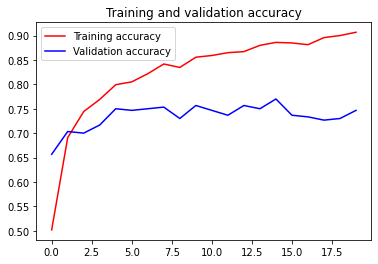

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot training and validation accuracy variation while training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
# save model and weights
vgg_model.save("/content/drive/MyDrive/Data science/ai_project_mars/vgg_model_msl.h5")

In [ ]:
# Load the best model
from keras.models import load_model
loaded_model_vgg = load_model("/content/drive/MyDrive/Project-Mars/best_models/vgg_model_msl.h5")

In [ ]:
# evaluate model on train, test and validation data
train_acc = loaded_model_vgg.evaluate(train_generator_vgg, verbose=0)[-1]*100
val_acc = loaded_model_vgg.evaluate(validation_generator_vgg, verbose=0)[-1]*100
test_acc = loaded_model_vgg.evaluate(test_generator_vgg, verbose=0)[-1]*100

print("Training accuracy is: {:.2f}%".format(train_acc))
print("Validation accuracy is: {:.2f}%".format(val_acc))
print("Testing accuracy is: {:.2f}%".format(test_acc))

### Transfer Learning with Inception_V3 model


In [ ]:
# download weight file for inception model pre trained on imagenet
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

# import inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# load model and weights
pre_trained_model = InceptionV3(input_shape = (300, 300, 3), 
                                include_top = False, 
                                weights = None)
pre_trained_model.load_weights(local_weights_file)

# freeze pre trained layers
for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()
# select mixed7 layer as last layer of pre trained model(custom trainable layers will be added after it)
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

**Preprocess Input**

In [ ]:
# use imagedatagenerator and rescale the images by 1./255 for all train, test and validation data
train_datagen_inc = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)
test_datagen_inc = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)
val_datagen_inc = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)


# Flow images in batches of 20 using data generators
train_generator_inc = train_datagen_inc.flow_from_directory('/content/msl_splitted_data/train',
                                                    batch_size = 20,
                                                    target_size = (300, 300))     


validation_generator_inc =  val_datagen_inc.flow_from_directory( '/content/msl_splitted_data/validation',
                                                          batch_size  = 20,
                                                          target_size = (300, 300))

test_generator_inc = test_datagen_inc.flow_from_directory('/content/msl_splitted_data/test',
                                                    target_size = (300, 300))

Found 5920 images belonging to 19 classes.
Found 300 images belonging to 19 classes.
Found 600 images belonging to 19 classes.


In [ ]:
# Flatten the output layer to 1 dimension and add our custom trainable dense layers and output layer.

x = GlobalAveragePooling2D()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.65)(x) 
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.45)(x)                 
x = layers.Dense  (19, activation='softmax')(x)           

inc_model = Model( pre_trained_model.input, x) 

# compile the model
inc_model.compile(optimizer = RMSprop(lr=0.001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# fit inception model on train data and save the history
history2 = inc_model.fit(
            train_generator,
            validation_data = validation_generator,
            epochs = 15,
            batch_size = 100,
            verbose = 1)

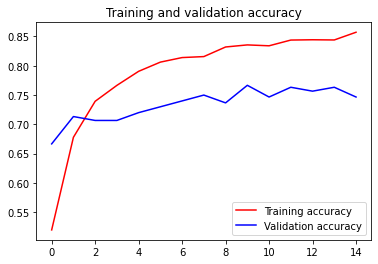

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot training and validation accuracy 
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'r', label='Training accuracy')
plt.plot(epochs2, val_acc2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()
plt.savefig("accuracy_graph_inception_msl.png", dpi=300, bbox_inches='tight', transparent=True)

In [ ]:
# save model and weights
inc_model.save("/content/drive/MyDrive/Data science/ai_project_mars/inc_model_msl.h5")

In [ ]:
# load the best model
loaded_model_inc = load_model("/content/drive/MyDrive/Project-Mars/best_models/inc_model_msl.h5")

In [ ]:
# evaluate model on train, test and validation data
train_acc = loaded_model_inc.evaluate(train_generator_inc, verbose=0)[-1]*100
val_acc = loaded_model_inc.evaluate(validation_generator_inc, verbose=0)[-1]*100
test_acc = loaded_model_inc.evaluate(test_generator_inc, verbose=0)[-1]*100

print("Training accuracy is: {:.2f}%".format(train_acc))
print("Validation accuracy is: {:.2f}%".format(val_acc))
print("Testing accuracy is: {:.2f}%".format(test_acc))

Training accuracy is: 90.81%
Validation accuracy is: 74.67%
Testing accuracy is: 79.17%


# Autoencoder

Next we try to achieve an image reconstruction/completion using autoencoders.Our aim is to pass a fraction of an image into the autoencoder and get the complete image retrieved. We tried two approaches for that:

1. We train an autoencoder by passing fraction of image as input and expect it to generate nly the remaining half.
2. We train an autoencoder by passing complete image as input and generate the complete image as output. While testing we pass only a fraction of image and see if it can retrieve the complete image.

We use the 'crater' class from HiRISE dataset for it as it has the most images for training after the 'other' class.

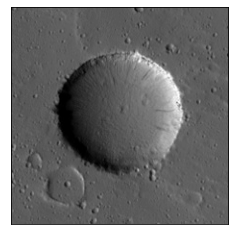

In [ ]:
#Load the image from crater class and convert it to array
path = '/content/splitted_data/train/crater/ESP_011386_2065_RED-0062-brt.jpg'
img = tf.keras.preprocessing.image.load_img(path, color_mode='grayscale',target_size=(227,227))
input_arr = tf.keras.preprocessing.image.img_to_array(img)

#Take a look at the image
plt.imshow(input_arr.reshape(227,227)/255.,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

Define a corrupt imagge function which returns 2 parts of the image. One part is the fraction which will be used for training, and the other part will be used to compare the output of the autoencoder(i.e for calculating loss)

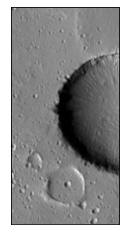

In [ ]:
#The function divides the image in two parts and return both of them separately
def corrupt_img(img_arr,frac):
  target = img_arr[:,int(227*frac):]
  image = img_arr[:,:int(227*frac)]
  
  return image,target

#Take a look at the training input for autoencoder
plt.imshow(corrupt_img(input_arr.reshape(227,227),0.5)[0]/255.,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

Now we fetch all images and process them into training fractions

In [ ]:
frac=0.5
image=[]
train = []

#Go through each image and get the training and target parts of it
for name in os.listdir('/content/splitted_data/train/crater'):
  path = '/content/splitted_data/train/crater/'+name
  img = tf.keras.preprocessing.image.load_img(path, color_mode='grayscale',target_size=(227,227))
  input_arr = tf.keras.preprocessing.image.img_to_array(img)
  
  corr_img,target = corrupt_img(input_arr/255.,frac)
  train.append(corr_img)
  image.append(target)

We check the dimensionalities to verify

In [ ]:
#Convert lists to arrays. Train is training input and image is the target arrays
image = np.array(image)
train = np.array(train)
image.shape

(3598, 227, 114, 1)

Get and print five images from the 'target' dataset. Or what the output of our model needs to look like

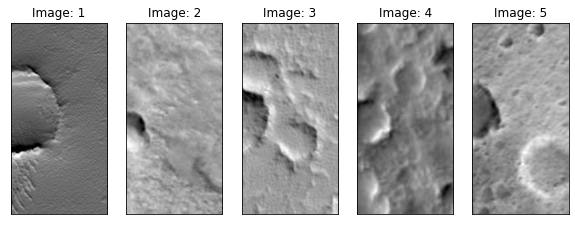

In [ ]:
# Looking at five images in target dataset

plt.figure(figsize=(10, 6))
for i in range(5):
  ax = plt.subplot(1, 5, i+1)
  ax.imshow(image[i].reshape(227, 114), cmap="gray")
  plt.title(f"Image: {i+1}")
  plt.xticks([])
  plt.yticks([])

Get and print five images from the 'training' dataset. r what the input to our model will be

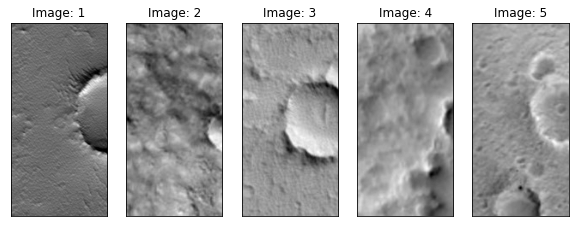

In [ ]:
# Looking at five images in target dataset

plt.figure(figsize=(10, 6))
for i in range(5):
  ax = plt.subplot(1, 5, i+1)
  ax.imshow(train[i].reshape(227, 113), cmap="gray")
  plt.title(f"Image: {i+1}")
  plt.xticks([])
  plt.yticks([])

Declaring our Autoencoder model structure here.

In [ ]:
#Declare the autoencoder and have a look at summary to confirm output sizes
ENC = Sequential()
ENC.add(Conv2D(96,(3,3),(2,2),activation='relu',padding='same',input_shape=(227,113,1)))
#ENC.add(Conv2D(96,(5,5),activation='relu',padding='same'))
ENC.add(Conv2D(96,(3,3),activation='relu',padding='same'))
ENC.add(Conv2D(256,(3,3),activation='relu',padding='same'))
ENC.add(Conv2D(256,(3,3),(2,2),activation='relu',padding='same'))
ENC.add(Conv2D(384,(5,5),activation='relu',padding='same'))
ENC.add(Conv2D(384,(3,3),activation='relu',padding='same'))
ENC.add(Conv2D(384,(3,3),(2,2),activation='relu',padding='same'))
ENC.add(Conv2D(384,(3,3),activation='relu',padding='same'))
ENC.add(Conv2D(384,(3,3),(2,2),activation='relu',padding='same'))
ENC.add(UpSampling2D((2,2)))
ENC.add(Conv2D(384,(3,3),activation='relu',padding='same'))
ENC.add(UpSampling2D((2,2)))
ENC.add(Conv2D(384,(3,3),activation='relu',padding='same'))
ENC.add(Conv2D(384,(5,5),activation='relu',padding='same'))
ENC.add(UpSampling2D((2,2)))
ENC.add(Conv2D(256,(3,3),activation='relu',padding='same'))
ENC.add(Conv2D(96,(3,3),activation='relu',padding='same'))
#ENC.add(Conv2D(96,(5,5),activation='relu',padding='same'))
ENC.add(UpSampling2D((2,2)))
ENC.add(Conv2D(1,(3,3),activation='relu',padding='same'))
ENC.add(tf.keras.layers.experimental.preprocessing.Resizing(227,114))
ENC.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 114, 57, 96)       960       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 114, 57, 96)       83040     
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 114, 57, 256)      221440    
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 57, 29, 256)       590080    
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 57, 29, 384)       2457984   
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 57, 29, 384)       1327488   
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 29, 15, 384)      

In [ ]:
#Compile and train the model
ENC.compile(optimizer=Adam(learning_rate=0.0001),loss='mse')
callback = tf.keras.callbacks.EarlyStopping(patience=5,monitor='loss',restore_best_weights=True)
history = ENC.fit(train,image,epochs=100,callbacks=[callback])

In [ ]:
#Save the weights for later use
# ENC.save_weights("/content/drive/MyDrive/Project-Mars/best_models/autoencoder1.h5")

We visualize the original image and the reconstructed image from training dataset. After a lot of tuning the results seem to be not very impressive. That is mainly due to limited training. Even when we had to recolor professor's image our network took more than 200 epochs to give satisfactory results on one image where as we are looking at 3600 images here.



In [ ]:
# load best model weights
ENC.load_weights("/content/drive/MyDrive/Project-Mars/best_models/autoencoder1.h5")

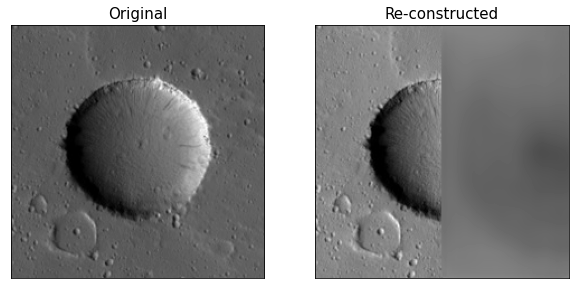

In [ ]:
#Get an image from train dataset
train_img = tf.keras.preprocessing.image.load_img('/content/splitted_data/train/crater/ESP_011386_2065_RED-0062-brt.jpg', color_mode='grayscale',target_size=(227,227))
input_arr = tf.keras.preprocessing.image.img_to_array(train_img)

#Corrupt the image using function
corr,target = corrupt_img(input_arr,0.5)

#Get predictions
pred = ENC.predict(corr.reshape(1,227,113,1))

#Combine prediction with corrupted image
pred_fin = np.concatenate([corr,pred.reshape(227,114,1)],axis=1)

#Plot original image and complete prediction
plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 2, 1)
ax.imshow(input_arr.reshape(227,227),cmap='gray')
plt.title("Original", fontsize=15)
plt.xticks([])
plt.yticks([])

#Plot complete prediction
ax = plt.subplot(1, 2, 2)
plt.imshow(pred_fin.reshape(227,227),cmap='gray')
plt.title("Re-constructed", fontsize=15)
plt.xticks([])
plt.yticks([])
plt.show()

Similar visualisation is done on a test image. And the results are again poor.

The major issue with this approach is that we are trying to generate a new image based on our input, wheres it would be better if we passed everything in the input and instead of generating new image we can ask for recollecting that part of image.

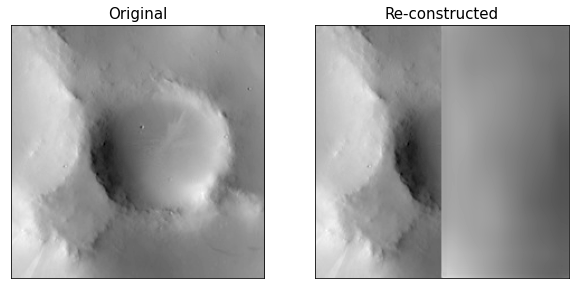

In [ ]:
#Get image from test dataset
test_img = tf.keras.preprocessing.image.load_img('/content/splitted_data/test/crater/ESP_011289_1950_RED-0092.jpg', color_mode='grayscale',target_size=(227,227))
input_arr = tf.keras.preprocessing.image.img_to_array(test_img)

#Corrupt the image
corr,target = corrupt_img(input_arr,0.5)

#Get predictiond for the image
pred = ENC.predict(corr.reshape(1,227,113,1))

#Combine prediction with corrupted image
pred_fin = np.concatenate([corr,pred.reshape(227,114,1)],axis=1)

#Plot original image
plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 2, 1)
ax.imshow(input_arr.reshape(227,227),cmap='gray')
plt.title("Original", fontsize=15)
plt.xticks([])
plt.yticks([])

#Plot complete prediction
ax = plt.subplot(1, 2, 2)
plt.imshow(pred_fin.reshape(227,227),cmap='gray')
plt.title("Re-constructed", fontsize=15)
plt.xticks([])
plt.yticks([])
plt.show()

Text(0.5, 0.98, 'Transfer Training')

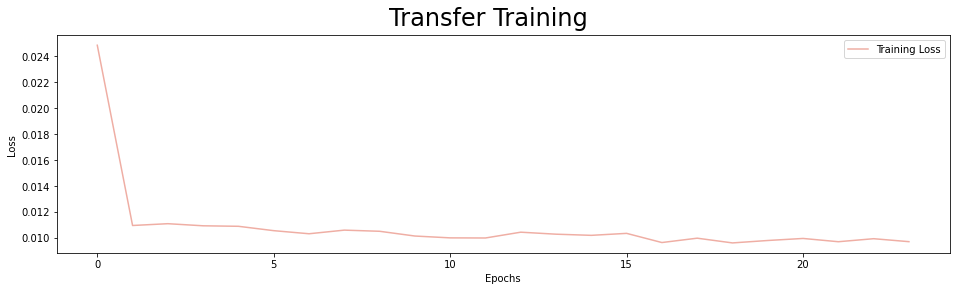

In [ ]:
#Plot the training loss
fig, ax = plt.subplots(figsize = (16,4))
ax.plot(history.history['loss'],color='#EFAEA4',label = 'Training Loss')
ax.legend()
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
fig.suptitle('Autoencoder Training', fontsize = 24)

Hence the next step is to train on complete image and ask it to generate the complete image back. We fetch our images first and verify their sizes.

In [ ]:
#Get the complete images and store them in a list
train = []
for name in os.listdir('/content/splitted_data/train/crater'):
  path = '/content/splitted_data/train/crater/'+name
  img = tf.keras.preprocessing.image.load_img(path, color_mode='grayscale',target_size=(227,227))
  input_arr = tf.keras.preprocessing.image.img_to_array(img)
  train.append(input_arr/255.)

#Convert list to array and look at shapes to verify
train = np.array(train)
print(train.shape)

(3598, 227, 227, 1)


Next we declare the model 

In [ ]:
#We declare the architecture for our model and take a look at summary to verify output sizes
ENC1 = Sequential()
ENC1.add(Conv2D(96,(5,5),(2,2),activation='relu',padding='same',input_shape=(227,227,1)))
#ENC.add(Conv2D(96,(5,5),activation='relu',padding='same'))
ENC1.add(Conv2D(96,(3,3),activation='relu',padding='same'))
ENC1.add(Conv2D(256,(3,3),activation='relu',padding='same'))
ENC1.add(Conv2D(256,(3,3),(2,2),activation='relu',padding='same'))
ENC1.add(Conv2D(384,(5,5),activation='relu',padding='same'))
ENC1.add(Conv2D(384,(3,3),activation='relu',padding='same'))
ENC1.add(Conv2D(384,(3,3),(2,2),activation='relu',padding='same'))
ENC1.add(Conv2D(384,(3,3),activation='relu',padding='same'))
ENC1.add(Conv2D(384,(3,3),(2,2),activation='relu',padding='same'))
ENC1.add(UpSampling2D((2,2)))
ENC1.add(Conv2D(384,(3,3),activation='relu',padding='same'))
ENC1.add(UpSampling2D((2,2)))
ENC1.add(Conv2D(384,(3,3),activation='relu',padding='same'))
ENC1.add(Conv2D(384,(5,5),activation='relu',padding='same'))
ENC1.add(UpSampling2D((2,2)))
ENC1.add(Conv2D(256,(3,3),activation='relu',padding='same'))
ENC1.add(Conv2D(96,(3,3),activation='relu',padding='same'))
#EN1C.add(Conv2D(96,(5,5),activation='relu',padding='same'))
ENC1.add(UpSampling2D((2,2)))
ENC1.add(Conv2D(1,(3,3),activation='relu',padding='same'))
ENC1.add(tf.keras.layers.experimental.preprocessing.Resizing(227,227))
ENC1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 114, 114, 96)      2496      
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 114, 114, 96)      83040     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 114, 114, 256)     221440    
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 57, 57, 256)       590080    
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 57, 57, 384)       2457984   
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 57, 57, 384)       1327488   
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 29, 29, 384)      

Next we fine tuning parameters and fit it

In [ ]:
#Compile and train the model
ENC1.compile(optimizer=Adam(learning_rate=0.001),loss='mse')
callback = tf.keras.callbacks.EarlyStopping(patience=5,monitor='loss',restore_best_weights=True)
history = ENC1.fit(train,train,epochs=100,callbacks=[callback])

We define a corrupt image function which returns only a fraction of the image back

In [ ]:
# Function below take an image and returns a fraction of it
def corrupt_img(img_arr,frac):
  img_arr[:,int(227*frac):] = 200
  
  return img_arr

In [ ]:
# Save weights for later use
# ENC1.save_weights("/content/drive/MyDrive/Project-Mars/best_models/autoencoder1.h5")

In [ ]:
# load best model weights
ENC1.load_weights("/content/drive/MyDrive/Project-Mars/best_models/autoencoder2.h5")

We check the corrupted image and the prediction made by the model on it. Not a complete prediction but the models prediction does reconstruct some part of the image, especially the crater.

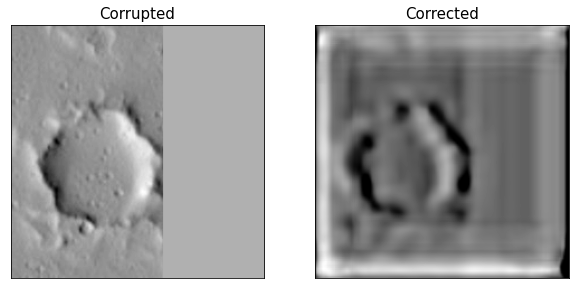

In [ ]:
#Fetch imagge from train dataset
train_img = tf.keras.preprocessing.image.load_img('/content/splitted_data/train/crater/ESP_011386_2065_RED-0093-brt.jpg', color_mode='grayscale',target_size=(227,227))
input_arr = tf.keras.preprocessing.image.img_to_array(train_img)

#Corrupt the image
corr = corrupt_img(input_arr,0.6)

#Get predictions for the image
pred = ENC1.predict(corr.reshape(1,227,227,1))

#Plot original image and complete prediction
plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 2, 1)
ax.imshow(input_arr.reshape(227,227),cmap='gray')
plt.title("Corrupted", fontsize=15)
plt.xticks([])
plt.yticks([])

#Plot complete prediction
ax = plt.subplot(1, 2, 2)
plt.imshow(pred.reshape(227,227),cmap='gray')
plt.title("Corrected", fontsize=15)
plt.xticks([])
plt.yticks([])
plt.show()